Scraping

In [1]:
import requests
import csv


url = "https://api.egytech.fyi/participants"

response = requests.get(url)
if response.status_code == 200:
    
    data = response.json()

    
    salary_data = data.get('results', [])

    if isinstance(salary_data, list) and len(salary_data) > 0:
        
        csv_file = "participants_data.csv"

        
        with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
            
            writer = csv.DictWriter(file, fieldnames=salary_data[0].keys())

            
            writer.writeheader()

            
            writer.writerows(salary_data)

        print(f"Data successfully exported to {csv_file}")
    else:
        print("No data found in the 'data' field.")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

Data successfully exported to participants_data.csv


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# DISCOVER DATA
data = pd.read_csv("c:/Users/Hp/Videos/final project/salaries1_data.csv")

DISCOVER DATA

In [118]:
data

,Timestamp,Gender,Degree,BusinessMarket,Title,ProgrammingLanguages,BusinessSize,Yoe,YoeBuckets,BusinessFocus,TotalCompensationEgp,BusinessLine,TotalCompensationEgpBuckets,Industries,WorkSetting,Level,IsEgp,CompanyLocation
0,4/2/2024 11:10:37,Male,Yes,NaN,Backend Engineer,"PHP, JavaScript, TypeScript, HTML/CSS",A Small and Medium Enterprise,5.0,5-8,Software House,41912.5,B2B & B2C lines,40-50K,"Fintech, Technology",Hybrid,Mid-level,No,Cairo
1,4/2/2024 11:12:13,Male,Yes,NaN,Frontend Engineer,"TypeScript, HTML/CSS",A Small and Medium Enterprise,3.0,1-3,Product-based company,20000.0,B2B,18-21K,Human Resources Services,Hybrid,Mid-level,Yes,Cairo
2,4/2/2024 11:15:17,Female,Yes,Global,UI/UX Designer/Engineer,NaN,A Small and Medium Enterprise,3.0,1-3,Product-based company,42000.0,B2B,40-50K,Technology,Remote/Egypt,Mid-level,Yes,Cairo
3,4/2/2024 11:18:12,Male,Yes,NaN,Backend Engineer,"PHP, JavaScript",A Large Enterprise/Multinational Company,1.0,1-3,Product-based company,16000.0,B2B,15-18K,Lead Gathering,Hybrid,Junior,Yes,Alexandria
4,4/2/2024 11:19:20,Male,Yes,NaN,Backend Engineer,"JavaScript, TypeScript",A Start-up,2.0,1-3,Product-based company,100590.0,B2B & B2C lines,100-120K,"Automotive, Transportation",Hybrid,Senior,No,No site in Egypt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,6/1/2024 8:40:49,Male,No,Regional,Data Analytics,"Python, SQL",A Small and Medium Enterprise,1.0,1-3,Product-based company,14200.0,B2B,NaN,"Delivery, Transportation",Office,Junior,Mix,Cairo
1645,6/1/2024 21:05:56,Male,Yes,Local,Backend Engineer,"C#, JPava, PHP, JavaScript, Python, C/C++, HTM...",A Start-up,3.0,3-5,Software House,10000.0,B2B & B2C lines,NaN,Technology,Remote/Egypt,Team Lead,Yes,Cairo
1646,6/1/2024 22:35:40,Male,No,Global,DevOps / SRE / Platform,"Python, Shell script",A Large Enterprise/Multinational Company,1.0,1-3,Software House,21585.0,B2B & B2C lines,NaN,"Telecommunications, Technology",Hybrid,Junior,Yes,Cairo
1647,6/3/2024 15:21:14,Male,Yes,Regional,Backend Engineer,JPava,A Large Enterprise/Multinational Company,2.0,1-3,Software House,22500.0,B2B,NaN,Fintech,Remote/Egypt,Mid-level,Yes,Cairo


In [119]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    1649 non-null   object 
 1   Gender                       1649 non-null   object 
 2   Degree                       1649 non-null   object 
 3   BusinessMarket               1267 non-null   object 
 4   Title                        1649 non-null   object 
 5   ProgrammingLanguages         1373 non-null   object 
 6   BusinessSize                 1649 non-null   object 
 7   Yoe                          1649 non-null   float64
 8   YoeBuckets                   1649 non-null   object 
 9   BusinessFocus                1649 non-null   object 
 10  TotalCompensationEgp         1649 non-null   float64
 11  BusinessLine                 1649 non-null   object 
 12  TotalCompensationEgpBuckets  1311 non-null   object 
 13  Industries        

In [120]:
print(data.describe())

               Yoe  TotalCompensationEgp
count  1649.000000           1649.000000
mean      3.309521          37083.877229
std       3.007646          33539.792429
min       0.000000           3000.000000
25%       1.000000          16250.000000
50%       2.000000          27000.000000
75%       4.000000          47000.000000
max      25.000000         357850.000000


DATA CLEANING

In [121]:
print(data.duplicated().sum())

0


In [122]:
print(data.isnull().sum())

Timestamp                        0
Gender                           0
Degree                           0
BusinessMarket                 382
Title                            0
ProgrammingLanguages           276
BusinessSize                     0
Yoe                              0
YoeBuckets                       0
BusinessFocus                    0
TotalCompensationEgp             0
BusinessLine                     0
TotalCompensationEgpBuckets    338
Industries                     138
WorkSetting                      0
Level                            0
IsEgp                            0
CompanyLocation                  1
dtype: int64


In [123]:
# xxxxxxxxx
#mode_value =data["BusinessMarket"].mode()[0]
#data["BusinessMarket"].fillna(mode_value,inplace=True)
#print(data)
#print(mode_value)
# print(data.isnull().sum())

In [19]:
for index, row in data.iterrows():
  if pd.isna(row["BusinessMarket"]) and row["BusinessSize"] == "A Start-up":
    data.loc[index, "BusinessMarket"] = "Local"
    print(f"BusinessMarket value at index {index} updated to Local")
  elif  pd.isna(row["BusinessMarket"]) and row["BusinessSize"] == "A Large Enterprise/Multinational Company":
    data.loc[index, "BusinessMarket"] = "Global"
    print(f"BusinessMarket value at index {index} updated to Global")
  elif  pd.isna(row["BusinessMarket"]) and row["BusinessSize"] == "A Small and Medium Enterprise":
    data.loc[index, "BusinessMarket"] = "Regional"
    print(f"BusinessMarket value at index {index} updated to Regional")  



BusinessMarket value at index 0 updated to Regional
BusinessMarket value at index 1 updated to Regional
BusinessMarket value at index 3 updated to Global
BusinessMarket value at index 4 updated to Local
BusinessMarket value at index 5 updated to Local
BusinessMarket value at index 7 updated to Local
BusinessMarket value at index 8 updated to Regional
BusinessMarket value at index 10 updated to Local
BusinessMarket value at index 17 updated to Regional
BusinessMarket value at index 20 updated to Local
BusinessMarket value at index 22 updated to Local
BusinessMarket value at index 24 updated to Regional
BusinessMarket value at index 27 updated to Regional
BusinessMarket value at index 32 updated to Regional
BusinessMarket value at index 33 updated to Local
BusinessMarket value at index 34 updated to Local
BusinessMarket value at index 37 updated to Regional
BusinessMarket value at index 39 updated to Regional
BusinessMarket value at index 40 updated to Global
BusinessMarket value at inde

In [125]:

print(data['BusinessMarket'].value_counts())

BusinessMarket
Regional    635
Global      590
Local       424
Name: count, dtype: int64


In [126]:
print(data.isnull().sum())

Timestamp                        0
Gender                           0
Degree                           0
BusinessMarket                   0
Title                            0
ProgrammingLanguages           276
BusinessSize                     0
Yoe                              0
YoeBuckets                       0
BusinessFocus                    0
TotalCompensationEgp             0
BusinessLine                     0
TotalCompensationEgpBuckets    338
Industries                     138
WorkSetting                      0
Level                            0
IsEgp                            0
CompanyLocation                  1
dtype: int64


In [20]:
for index, row in data.iterrows(): 
  if pd.isna(row["ProgrammingLanguages"]) and row["Title"] =="AI & Automation Engineer":
    data.loc[index, "ProgrammingLanguages"] = "Python"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Backend Engineer":
        data.loc[index, "ProgrammingLanguages"] = "C# , JPava , JavaScript , PHP"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "CRM Developer":
        data.loc[index, "ProgrammingLanguages"] = "No" 
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Data Analytics":
        data.loc[index, "ProgrammingLanguages"] = "Python , SQL" 
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Data Engineer":
        data.loc[index, "ProgrammingLanguages"] = "Python , JPava " 
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Data Scientist":
        data.loc[index, "ProgrammingLanguages"] = "Python , JavaScript"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "DevOps / SRE / Platform":
        data.loc[index, "ProgrammingLanguages"] = "JavaScript , JPava ,Python"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Engineering Manager":
        data.loc[index, "ProgrammingLanguages"] = "No"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Frontend Engineer":
        data.loc[index, "ProgrammingLanguages"] = "JavaScript"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Full-stack Engineer":
        data.loc[index, "ProgrammingLanguages"] = "C# , JavaScript ,JPava"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Mobile Development Engineer":
        data.loc[index, "ProgrammingLanguages"] = "Dart , JPava , Kotlin ,JavaScript"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Product Manager": 
        data.loc[index, "ProgrammingLanguages"] = "No"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "QA / SDET Engineer":
        data.loc[index, "ProgrammingLanguages"] = "JPava"     
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "R&D Engineer (Computer Vision, NLP, etc.)":
        data.loc[index, "ProgrammingLanguages"] = "Python"  
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Scrum Master":
        data.loc[index, "ProgrammingLanguages"] = "No"            
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Security/Network Engineer":
        data.loc[index, "ProgrammingLanguages"] = "No"  
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Systems Architect":
        data.loc[index, "ProgrammingLanguages"] = "JPava"             
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Technical Support":
        data.loc[index, "ProgrammingLanguages"] = "No"  
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "UI/UX Designer/Engineer":
        data.loc[index, "ProgrammingLanguages"] = "No" 
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Executive (C-level, director, etc.)":
        data.loc[index, "ProgrammingLanguages"] = "No"    
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Hardware Engineer (Semiconductors, Digital Design, Electronics, etc)":
        data.loc[index, "ProgrammingLanguages"] = "No" 
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Embedded Systems Engineer":
        data.loc[index, "ProgrammingLanguages"] = "No"

                         



In [128]:
print(data["ProgrammingLanguages"])

0                   PHP, JavaScript, TypeScript, HTML/CSS
1                                    TypeScript, HTML/CSS
2                                                      No
3                                         PHP, JavaScript
4                                  JavaScript, TypeScript
                              ...                        
1644                                          Python, SQL
1645    C#, JPava, PHP, JavaScript, Python, C/C++, HTM...
1646                                 Python, Shell script
1647                                                JPava
1648                               JavaScript, TypeScript
Name: ProgrammingLanguages, Length: 1649, dtype: object


In [129]:
print(data.isnull().sum())

Timestamp                        0
Gender                           0
Degree                           0
BusinessMarket                   0
Title                            0
ProgrammingLanguages            31
BusinessSize                     0
Yoe                              0
YoeBuckets                       0
BusinessFocus                    0
TotalCompensationEgp             0
BusinessLine                     0
TotalCompensationEgpBuckets    338
Industries                     138
WorkSetting                      0
Level                            0
IsEgp                            0
CompanyLocation                  1
dtype: int64


In [21]:
# split coulmn TotalCompensationEgpBuckets and drop
data[['MinCompensationRange', 'MaxCompensationRange']] = data['TotalCompensationEgpBuckets'].str.split('-', expand=True)
data['MaxCompensationRange'] = data['MaxCompensationRange'].str.rstrip('K')
data.drop('TotalCompensationEgpBuckets', axis=1, inplace=True)

In [22]:
#convert to date
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%Y %H:%M:%S') 


In [23]:
#delete time
data['Timestamp'] = data['Timestamp'].dt.strftime('%Y-%m-%d')

In [24]:
#convert to date again
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d')

In [134]:
data["CompanyLocation"].fillna("Cairo",inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13816\3632285164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["CompanyLocation"].fillna("Cairo",inplace=True)


In [135]:
data['MinCompensationRange'] = data['MinCompensationRange'].str.rstrip('+')

In [3]:
data = pd.read_excel(r"c:\Users\Hp\Videos\.ipynb_checkpoints\industry2.xlsx")

In [137]:
data

,MinCompensationRange,MaxCompensationRange,TotalCompensationEgp,Industries
0,40,50,41912.5,"Fintech, Technology"
1,18,21,20000.0,Human Resources Services
2,40,50,42000.0,Technology
3,15,18,16000.0,Lead Gathering
4,100,120,100590.0,"Automotive, Transportation"
...,...,...,...,...
1644,12,18,14200.0,"Delivery, Transportation"
1645,9,12,10000.0,Technology
1646,21,25,21585.0,"Telecommunications, Technology"
1647,20,25,22500.0,Fintech


In [4]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Step 2: Impute categorical column 'Industries' separately using mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

# Encode 'Industries' after imputing missing values
label_encoder = LabelEncoder()
data['Industries_encoded'] = label_encoder.fit_transform(data['Industries'])

# Step 3: Now drop the original 'Industries' column and keep the encoded one
data_encoded = data.drop(['Industries'], axis=1)

# Step 4: Apply KNNImputer to the remaining numerical columns
imputer = KNNImputer(n_neighbors=2)
data_encoded[numerical_cols] = imputer.fit_transform(data_encoded[numerical_cols])

# Step 5: Convert back to DataFrame if necessary and restore 'Industries' labels
data_imputed_df = pd.DataFrame(data_encoded, columns=data_encoded.columns)
data_imputed_df['Industries'] = label_encoder.inverse_transform(data_imputed_df['Industries_encoded'].astype(int))

# Drop the encoded column if it's no longer needed
data_imputed_df = data_imputed_df.drop(['Industries_encoded'], axis=1)

# Final dataset
print(data_imputed_df)
print(data['Industries'][14]) 

      MinCompensationRange  MaxCompensationRange  TotalCompensationEgp  \
0                     40.0                  50.0               41912.5   
1                     18.0                  21.0               20000.0   
2                     40.0                  50.0               42000.0   
3                     15.0                  18.0               16000.0   
4                    100.0                 120.0              100590.0   
...                    ...                   ...                   ...   
1644                  12.0                  18.0               14200.0   
1645                   9.0                  12.0               10000.0   
1646                  21.0                  25.0               21585.0   
1647                  20.0                  25.0               22500.0   
1648                  12.0                  15.0               12000.0   

                          Industries  
0                Fintech, Technology  
1           Human Resources Servi

In [139]:
print(data['Industries'][14])    # kant missing

Fintech


In [140]:

data["Industries"].fillna("Fintech",inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13816\1915237497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Industries"].fillna("Fintech",inplace=True)


In [5]:
for index, row in data.iterrows():
    # Check if either MinCompensationRange or MaxCompensationRange is NaN
    if pd.isna(row["MinCompensationRange"]) or pd.isna(row["MaxCompensationRange"]):
        if 3 <= row["TotalCompensationEgp"] < 25:
            data.loc[index, "MinCompensationRange"] = row["TotalCompensationEgp"] - 1500
            data.loc[index, "MaxCompensationRange"] = row["TotalCompensationEgp"] + 1500
        elif 25 <= row["TotalCompensationEgp"] < 40:
            data.loc[index, "MinCompensationRange"] = row["TotalCompensationEgp"] - 2500
            data.loc[index, "MaxCompensationRange"] = row["TotalCompensationEgp"] + 2500
        elif 40 <= row["TotalCompensationEgp"] < 90:
            data.loc[index, "MinCompensationRange"] = row["TotalCompensationEgp"] - 5000
            data.loc[index, "MaxCompensationRange"] = row["TotalCompensationEgp"] + 5000
        elif 90 <= row["TotalCompensationEgp"] < 200:
            data.loc[index, "MinCompensationRange"] = row["TotalCompensationEgp"] - 10000
            data.loc[index, "MaxCompensationRange"] = row["TotalCompensationEgp"] + 10000

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
data2 = pd.read_excel(r"c:\Users\Hp\Desktop\final progect5.xlsx")

In [3]:
for index, row in data2.iterrows(): 
    if pd.isna(row["ProgrammingLanguages"]) and row["Title"] =="Product Owner":
       data2.loc[index, "ProgrammingLanguages"] = "No"  

In [8]:
data2.isnull().sum()

Timestamp               0
Gender                  0
Degree                  0
BusinessMarket          0
Title                   0
ProgrammingLanguages    0
BusinessSize            0
Yoe                     0
YoeBuckets              0
BusinessFocus           0
TotalCompensationEgp    0
BusinessLine            0
Industries              0
WorkSetting             0
Level                   0
IsEgp                   0
CompanyLocation         0
MinCompensationRange    0
MaxCompensationRange    0
dtype: int64

In [4]:
data2['MaxCompensationRange'] = pd.to_numeric(data2['MaxCompensationRange']) * 1000
data2['MinCompensationRange'] = pd.to_numeric(data2['MinCompensationRange']) * 1000

In [5]:
data2.drop('YoeBuckets', axis=1, inplace=True)

In [ ]:
data2

In [149]:
data2.columns

Index(['Timestamp', 'Gender', 'Degree', 'BusinessMarket', 'Title',
       'ProgrammingLanguages', 'BusinessSize', 'Yoe', 'BusinessFocus',
       'TotalCompensationEgp', 'BusinessLine', 'Industries', 'WorkSetting',
       'Level', 'IsEgp', 'CompanyLocation', 'MinCompensationRange',
       'MaxCompensationRange'],
      dtype='object')

REGERSSION

In [150]:
# regression for totalcompensatione

# Create dummy variables for categorical columns
data2 = pd.get_dummies(data2, columns=['Level', 'IsEgp', 'CompanyLocation', 'BusinessLine', 'WorkSetting', 'BusinessMarket', 'BusinessSize', 'BusinessFocus'], drop_first=True)

# Check for missing values and handle them (e.g., dropping rows with missing values)
data2 = data2.dropna()

# Convert all boolean columns to numeric (0 and 1)
data2 = data2.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Define the independent variables (X) and dependent variable (y)
dummy_columns = [col for col in data2.columns if 'Level_' in col or 
                 'IsEgp_' in col or 
                 'CompanyLocation_' in col or 
                 'BusinessLine_' in col or 
                 'WorkSetting_' in col or 
                 'BusinessMarket_' in col or 
                 'BusinessSize_' in col or 
                 'BusinessFocus_' in col]

X = data2[['Yoe'] + dummy_columns]
y = data2['TotalCompensationEgp']

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results with the correct variable names
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     TotalCompensationEgp   R-squared:                       0.538
Model:                              OLS   Adj. R-squared:                  0.523
Method:                   Least Squares   F-statistic:                     37.94
Date:                  Sat, 05 Oct 2024   Prob (F-statistic):          1.37e-229
Time:                          04:57:07   Log-Likelihood:                -18887.
No. Observations:                  1649   AIC:                         3.787e+04
Df Residuals:                      1599   BIC:                         3.814e+04
Df Model:                            49                                         
Covariance Type:              nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

C:\Users\Hp\AppData\Local\Temp\ipykernel_13816\46975211.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data2 = data2.applymap(lambda x: 1 if x is True else (0 if x is False else x))


CORRELATION


In [ ]:
corr2=data2.corr()
print(corr2)

OUTLIERS

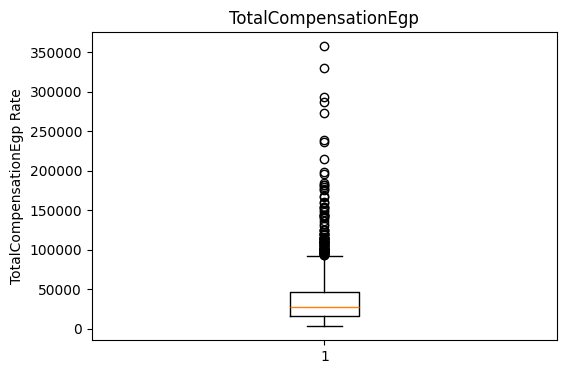

In [8]:
plt.figure(figsize=(6, 4))
plt.boxplot(data2['TotalCompensationEgp'])
plt.title('TotalCompensationEgp')
plt.ylabel('TotalCompensationEgp Rate')
plt.show()

In [ ]:
Q1 = data2['TotalCompensationEgp'].quantile(0.25)
Q3 = data2['TotalCompensationEgp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = data2[(data2['TotalCompensationEgp'] < lower_bound) | (data2['TotalCompensationEgp'] > upper_bound)]

outliers_data2=outliers
print(outliers_data2)
# print(Q1)
# print(Q3)
# print(IQR)
# print(lower_bound)
# print(upper_bound)

Analysis Outliers

In [10]:
print(outliers_data2.describe())

                 Timestamp        Yoe  TotalCompensationEgp  \
count                   99  99.000000             99.000000   
mean   2024-04-13 16:00:00   7.484848         134419.582828   
min    2024-04-02 00:00:00   0.000000          93220.000000   
25%    2024-04-02 00:00:00   5.000000         101250.000000   
50%    2024-04-08 00:00:00   7.000000         114145.700000   
75%    2024-04-19 00:00:00   9.500000         146095.000000   
max    2024-05-24 00:00:00  17.000000         357850.000000   
std                    NaN   3.753539          52083.200165   

       MinCompensationRange  MaxCompensationRange  
count             99.000000             99.000000  
mean          119393.939394         147272.727273  
min            80000.000000         100000.000000  
25%           100000.000000         120000.000000  
50%           100000.000000         120000.000000  
75%           140000.000000         160000.000000  
max           200000.000000         400000.000000  
std            3

In [15]:
print(outliers_data2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 4 to 1632
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Timestamp             99 non-null     datetime64[ns]
 1   Gender                99 non-null     object        
 2   Degree                99 non-null     object        
 3   BusinessMarket        99 non-null     object        
 4   Title                 99 non-null     object        
 5   ProgrammingLanguages  99 non-null     object        
 6   BusinessSize          99 non-null     object        
 7   Yoe                   99 non-null     float64       
 8   BusinessFocus         99 non-null     object        
 9   TotalCompensationEgp  99 non-null     float64       
 10  BusinessLine          99 non-null     object        
 11  Industries            99 non-null     object        
 12  WorkSetting           99 non-null     object        
 13  Level                 99 

                                                         TotalCompensationEgp
BusinessSize                             BusinessMarket                      
A Large Enterprise/Multinational Company Global                 137066.104000
                                         Local                  113000.000000
                                         Regional               118400.866667
A Small and Medium Enterprise            Global                 154037.153846
                                         Local                  130375.000000
                                         Regional               130676.705556
A Start-up                               Global                 180660.000000
                                         Local                  126901.071429
                                         Regional               123240.700000


<Figure size 1400x800 with 0 Axes>

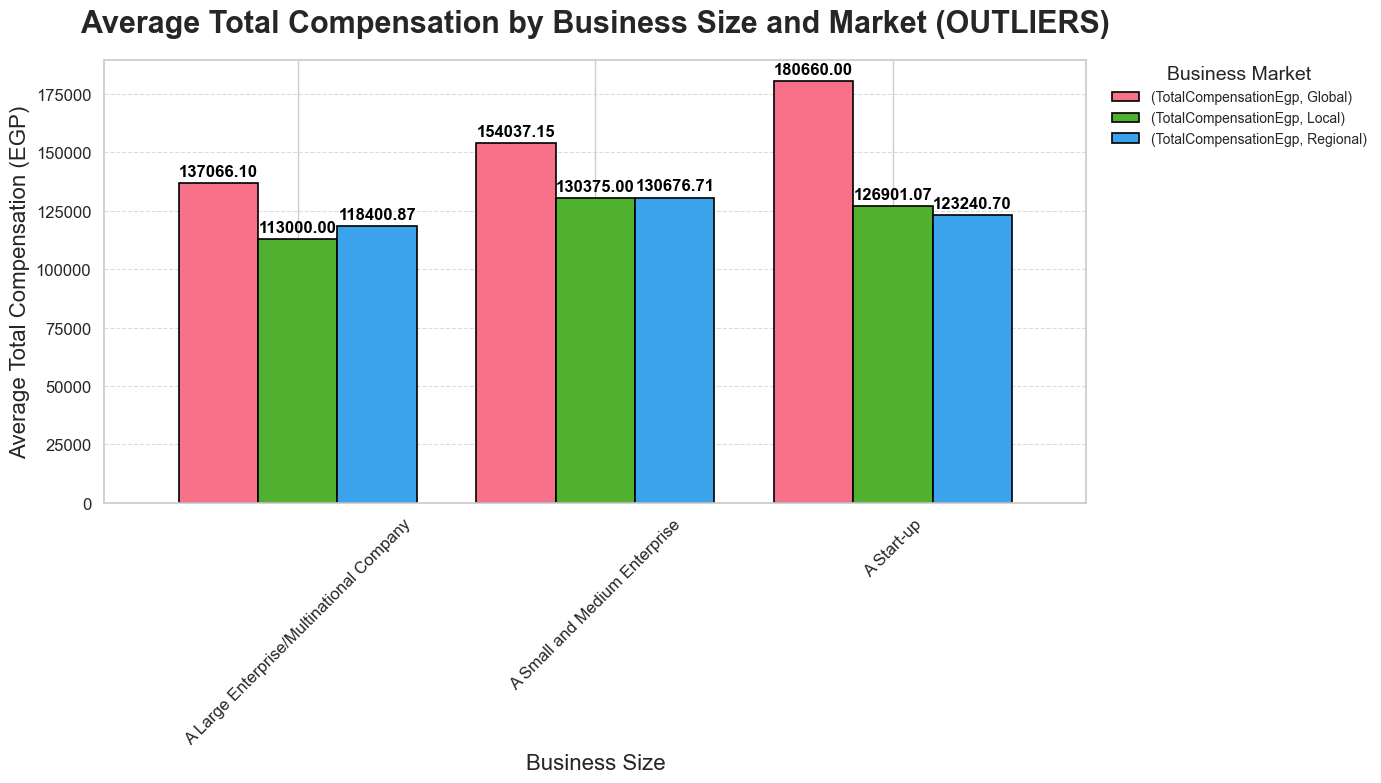

In [21]:
pivot_table = pd.pivot_table(
    outliers_data2,
    index=['BusinessSize', 'BusinessMarket'],
    aggfunc={'TotalCompensationEgp': 'mean'},
    fill_value=0
)
print(pivot_table)
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(pivot_table.index.levels[1]))
plt.figure(figsize=(14, 8))
pivot_table_unstacked = pivot_table.unstack(level=1) 
ax = pivot_table_unstacked.plot(
    kind='bar',
    figsize=(14, 8),
    color=palette,
    edgecolor='black',
    linewidth=1.2,
    width=0.8  
)
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f',
        label_type='edge', 
        fontsize=12,          
        color='black',
        weight='bold',
        padding=3
    )
plt.title('Average Total Compensation by Business Size and Market (OUTLIERS)',
    fontsize=22,
    fontweight='bold',
    pad=20
)
plt.xlabel('Business Size', fontsize=16)
plt.ylabel('Average Total Compensation (EGP)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(
    title='Business Market',
    title_fontsize='14',
    fontsize='10',            
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,        
    frameon=False              
)
plt.grid(
    axis='y',
    linestyle='--',
    alpha=0.7,
    linewidth=0.8
)
plt.tight_layout()
plt.savefig('enhanced_compensation_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()


Level
Director                  2
Group Product Manager     1
Junior                    5
Manager                  15
Mid-level                 9
Principal                 3
Senior                   41
Senior Manager            1
Senior Staff              1
Staff                     7
Team Lead                14
dtype: int64


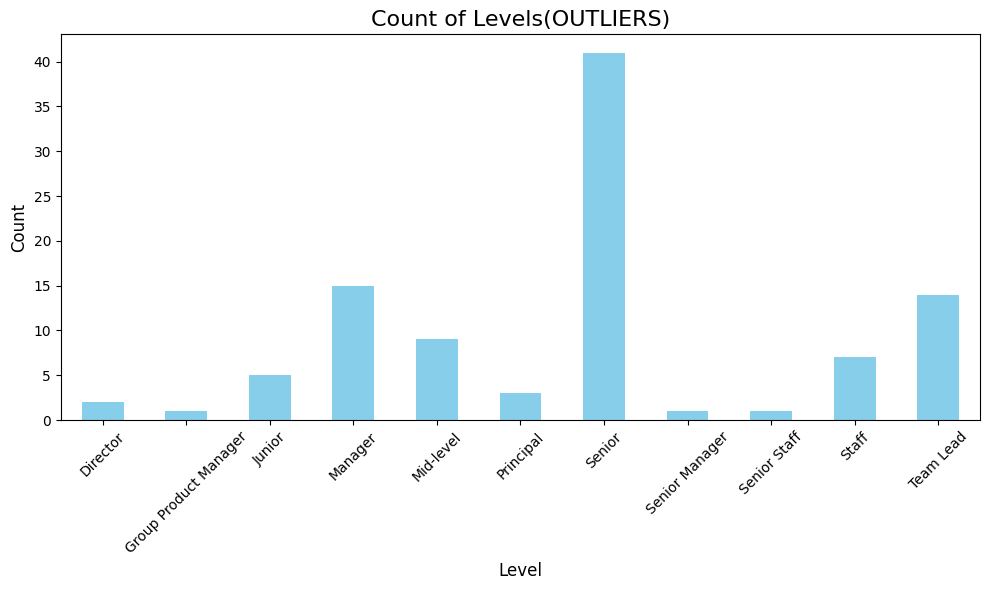

In [166]:
pivot_table = pd.pivot_table(
                             outliers_data2,
                             index='Level',             
                             aggfunc='size',                            
                             fill_value=0                    
                             )   
print(pivot_table)
pivot_table.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Count of Levels(OUTLIERS)', fontsize=16)
plt.xlabel('Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


                Gender  TotalCompensationEgp  Percentage
BusinessMarket                                          
Global              42         146470.847619   36.792674
Local               17         126492.058824   31.774112
Regional            40         125134.952500   31.433214


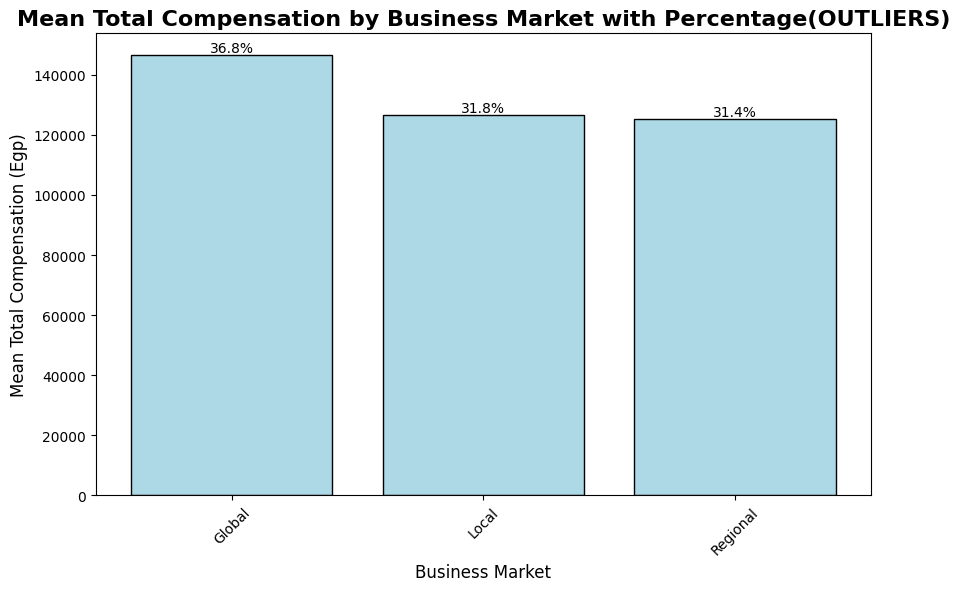

In [168]:
pivot_table = pd.pivot_table(
    outliers_data2,
    index='BusinessMarket',
    aggfunc={'TotalCompensationEgp': 'mean', 'Gender': 'count'}, 
    fill_value=0
)
pivot_table['Percentage'] = (pivot_table['TotalCompensationEgp'] / pivot_table['TotalCompensationEgp'].sum()) * 100
print(pivot_table)

fig, ax1 = plt.subplots(figsize=(10, 6))
bars = ax1.bar(pivot_table.index, pivot_table['TotalCompensationEgp'], color='lightblue', edgecolor='black')
for bar, perc in zip(bars, pivot_table['Percentage']):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{perc:.1f}%', ha='center', va='bottom', fontsize=10)
ax1.set_title('Mean Total Compensation by Business Market with Percentage(OUTLIERS)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Business Market', fontsize=12)
ax1.set_ylabel('Mean Total Compensation (Egp)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)



IsEgp
Mix     1
No     65
Yes    33
dtype: int64


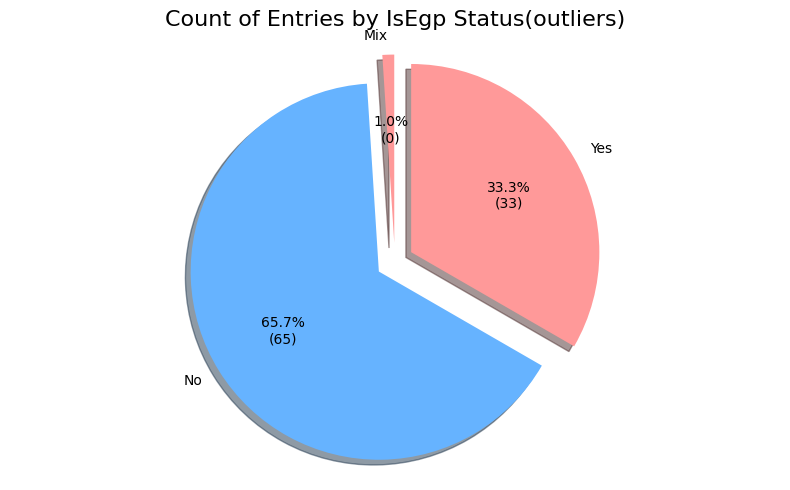

In [169]:
pivot_table = pd.pivot_table(                                 
                             outliers_data2,
                             index='IsEgp',             
                             aggfunc='size',                             
                             fill_value=0                    
                             )   
print(pivot_table)

sizes = pivot_table.values  
labels = pivot_table.index  
colors = ['#ff9999','#66b3ff']
explode = [0.1] * len(labels)  
plt.figure(figsize=(8, 5))  
plt.pie(sizes, 
        explode=explode,          
        labels=labels,           
        colors=colors,          
        autopct=lambda p: f'{p:.1f}%\n({int(p/100.*sum(sizes))})', 
        shadow=True,       
        startangle=90)         
plt.title('Count of Entries by IsEgp Status(outliers)', fontsize=16) 
plt.axis('equal')  
plt.tight_layout() 
plt.show() 


ANOVA OUTLIERS


In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# List of categorical columns to run ANOVA on
categorical_columns = ['Gender', 'Degree', 'BusinessMarket', 'Title', 
                       'ProgrammingLanguages', 'BusinessSize', 
                       'BusinessFocus', 'BusinessLine', 
                       'Industries', 'WorkSetting', 'Level', 
                       'IsEgp', 'CompanyLocation']

# Check for actual existing columns
existing_columns = [col for col in categorical_columns if col in outliers_data2.columns]

# Loop through each categorical variable and perform ANOVA
for col in existing_columns:
    print(f"\nANOVA for {col} vs TotalCompensationEgp:")
    
    # Fit the model
    try:
        model = ols(f'TotalCompensationEgp ~ C({col})', data=outliers_data2).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)
    except Exception as e:
        print(f"Error processing ANOVA for {col}: {e}")
    print('-' * 80)  



ANOVA for Gender vs TotalCompensationEgp:
                 sum_sq    df         F    PR(>F)
C(Gender)  3.602193e+08   1.0  0.131615  0.717552
Residual   2.654804e+11  97.0       NaN       NaN
--------------------------------------------------------------------------------

ANOVA for Degree vs TotalCompensationEgp:
                 sum_sq    df         F    PR(>F)
C(Degree)  1.038713e+10   1.0  3.944167  0.049857
Residual   2.554535e+11  97.0       NaN       NaN
--------------------------------------------------------------------------------

ANOVA for BusinessMarket vs TotalCompensationEgp:
                         sum_sq    df         F    PR(>F)
C(BusinessMarket)  1.061634e+10   2.0  1.996613  0.141394
Residual           2.552243e+11  96.0       NaN       NaN
--------------------------------------------------------------------------------

ANOVA for Title vs TotalCompensationEgp:
                sum_sq    df         F    PR(>F)
C(Title)  2.013839e+10  16.0  0.420058  0.973296
Residu

Analysis Data

Level
Junior       668
Mid-level    488
Senior       351
dtype: int64


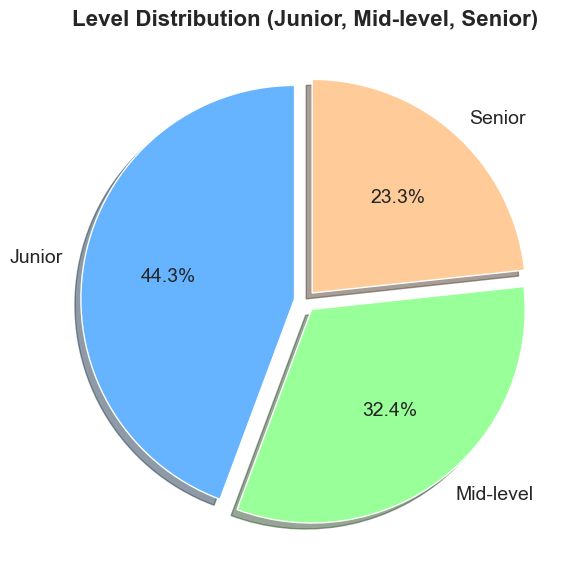

In [22]:
filtered_data2 = data2[data2['Level'].isin(['Junior', 'Mid-level','Senior'])]  
pivot_table = pd.pivot_table(
                             filtered_data2,    
                             index='Level',                            
                             aggfunc='size',                         
                             fill_value=0                    
                             )              
print(pivot_table)
plt.figure(figsize=(6, 6))
colors = ['#66b3ff', '#99ff99', '#ffcc99']
plt.pie(pivot_table, 
        labels=pivot_table.index, 
        autopct='%1.1f%%',         
        startangle=90,           
        colors=colors,         
        explode=(0.05, 0.05, 0.05),  
        shadow=True,             
        textprops={'fontsize': 14}
        )
plt.title('Level Distribution (Junior, Mid-level, Senior)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

BusinessSize  A Large Enterprise/Multinational Company  \
Level                                                    
Junior                                             235   
Mid-level                                          162   
Senior                                             156   

BusinessSize  A Small and Medium Enterprise  A Start-up  
Level                                                    
Junior                                  243         190  
Mid-level                               170         156  
Senior                                  119          76  


<Figure size 1200x700 with 0 Axes>

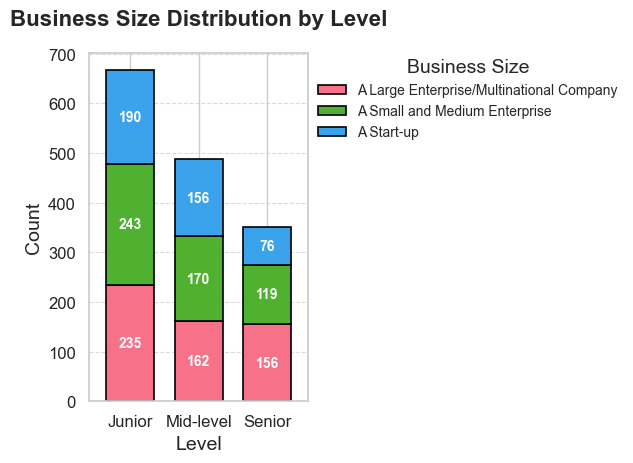

In [24]:
filtered_data2 = data2[data2['Level'].isin(['Junior', 'Mid-level', 'Senior'])]
pivot_table = pd.pivot_table(
    filtered_data2,
    columns='BusinessSize',
    index='Level',
    aggfunc='size',
    fill_value=0
)
print(pivot_table)

sns.set(style="whitegrid")
business_size_categories = pivot_table.columns.tolist()
num_categories = len(business_size_categories)
palette = sns.color_palette("husl", num_categories)
plt.figure(figsize=(12, 7))
ax = pivot_table.plot(
    kind='bar',
    stacked=True,
    color=palette,
    edgecolor='black',
    linewidth=1.2,
    width=0.7  
)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{int(label.get_height())}' for label in container],
        label_type='center',   
        fontsize=10,       
        color='white',         
        weight='bold',
    )
plt.title(
    'Business Size Distribution by Level',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(
    title='Business Size',
    title_fontsize='14',
    fontsize='10',            
    bbox_to_anchor=(1.02, 1),  
    loc='upper left',
    borderaxespad=0,         
    frameon=False             
)
plt.grid(
    axis='y',
    linestyle='--',
    alpha=0.7,
    linewidth=0.8
)

# --- Layout Adjustment ---

plt.tight_layout()
plt.savefig('enhanced_business_size_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


Degree
No      326
Yes    1323
dtype: int64


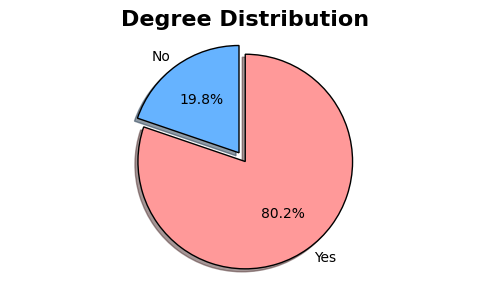

In [173]:
pivot_table = pd.pivot_table(
                             data2,
                             index='Degree',                           
                             aggfunc='size',                           
                             fill_value=0                    
                             )   
print(pivot_table)

plt.figure(figsize=(5, 3))  
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']  
explode = [0.05] * len(pivot_table) 
plt.pie(
    pivot_table,
    labels=pivot_table.index,
    autopct='%1.1f%%',
    startangle=90, 
    colors=colors,
    explode=explode, 
    shadow=True, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Degree Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()  
plt.show()


BusinessSize  A Large Enterprise/Multinational Company  \
Degree                                                   
No                                                  99   

BusinessSize  A Small and Medium Enterprise  A Start-up  
Degree                                                   
No                                      117         110  


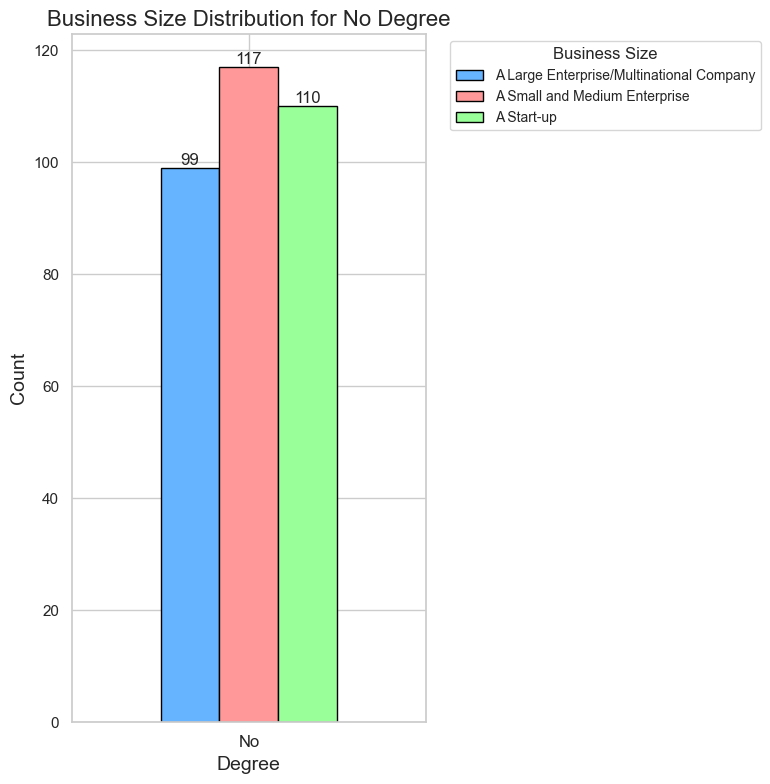

In [30]:
filtered_data2 = data2[data2['Degree'].isin(["No"])]   
pivot_table = pd.pivot_table(
                             filtered_data2 ,
                             columns='BusinessSize',
                             index='Degree',                             
                             aggfunc='size',                           
                             fill_value=0                    
                             )   

print(pivot_table)

ax = pivot_table.plot(kind='bar', figsize=(8, 8), color=['#66b3ff', '#ff9999', '#99ff99'], edgecolor='black')
plt.title('Business Size Distribution for No Degree', fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Business Size', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    plt.bar_label(container)
plt.tight_layout()
plt.show()





Level   Director  Junior  Manager  Mid-level  Principal  Senior  \
Degree                                                            
No             2     133        6         92          2      78   

Level   Senior Manager  Senior Staff  Staff  Team Lead  VP  
Degree                                                      
No                   1             1      2          8   1  


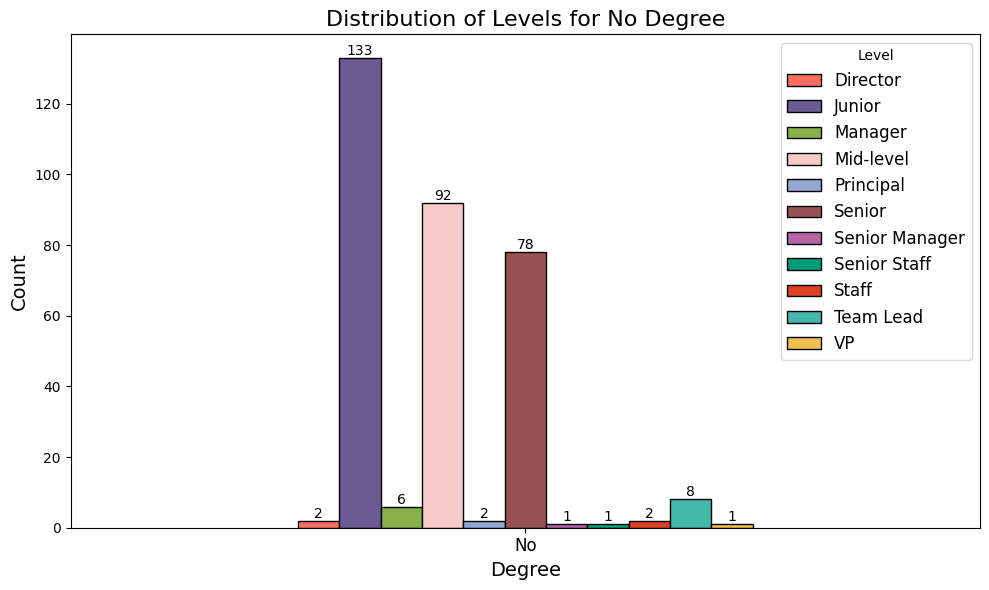

In [175]:
filtered_data2 = data2[data2['Degree'].isin(["No"])]   
pivot_table = pd.pivot_table(
                             filtered_data2 ,
                             columns='Level',
                             index='Degree',                             
                             aggfunc='size',                         
                             fill_value=0                    
                             )   
print(pivot_table)
custom_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', 
                 '#B565A7', '#009B77', '#DD4124', '#45B8AC', '#EFC050', '#5B5EA6']
ax = pivot_table.plot(kind='bar', figsize=(10, 6), color=custom_colors[:len(pivot_table.columns)], edgecolor='black')
plt.title('Distribution of Levels for No Degree', fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Level', fontsize=12)
for container in ax.containers:
    plt.bar_label(container)
plt.tight_layout()
plt.show()


BusinessLine                              B2B  B2B & B2C lines  B2C
BusinessSize                                                       
A Large Enterprise/Multinational Company  252              278   77
A Small and Medium Enterprise             277              228   82
A Start-up                                175              173  107


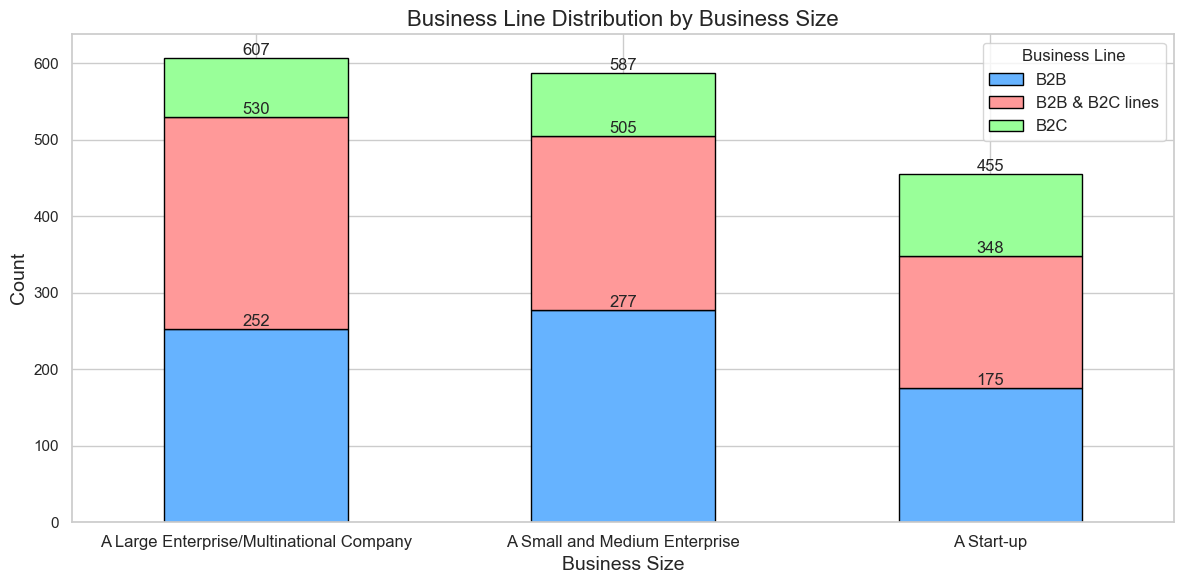

In [32]:
pivot_table = pd.pivot_table(
                             data2 ,
                             columns='BusinessLine',
                             index='BusinessSize',                            
                             aggfunc='size',                           
                             fill_value=0                    
                             )   

print(pivot_table)
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'], edgecolor='black')
plt.title('Business Line Distribution by Business Size', fontsize=16)
plt.xlabel('Business Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12) 
plt.legend(title='Business Line', fontsize=12) 
for container in ax.containers:
    plt.bar_label(container)
plt.tight_layout()  
plt.show()


Gender
Female     361
Male      1288
dtype: int64


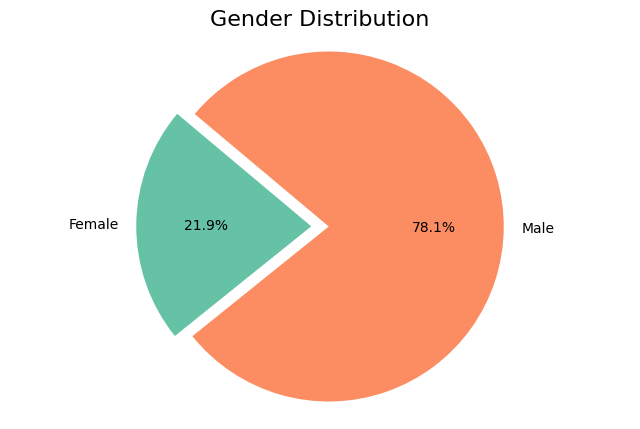

In [177]:
pivot_table = pd.pivot_table(
    data2, 
    index='Gender',              
    aggfunc='size',                
    fill_value=0                   
)
print(pivot_table)

plt.figure(figsize=(8, 5)) 
plt.pie(
    pivot_table,
    labels=pivot_table.index,
    autopct='%1.1f%%',
    startangle=140,  
    colors=['#66c2a5', '#fc8d62'],
    explode=(0.1, 0),  
)

plt.title('Gender Distribution', fontsize=16)
plt.axis('equal') 
plt.show()





Female Distribution by Business Size and Market:
BusinessSize   A Large Enterprise/Multinational Company                 \
BusinessMarket                                   Global Local Regional   
Gender                                                                   
Female                                              103    15       25   

BusinessSize   A Small and Medium Enterprise                A Start-up        \
BusinessMarket                        Global Local Regional     Global Local   
Gender                                                                         
Female                                    33    23       77         23    32   

BusinessSize             
BusinessMarket Regional  
Gender                   
Female               30  


<Figure size 1200x600 with 0 Axes>

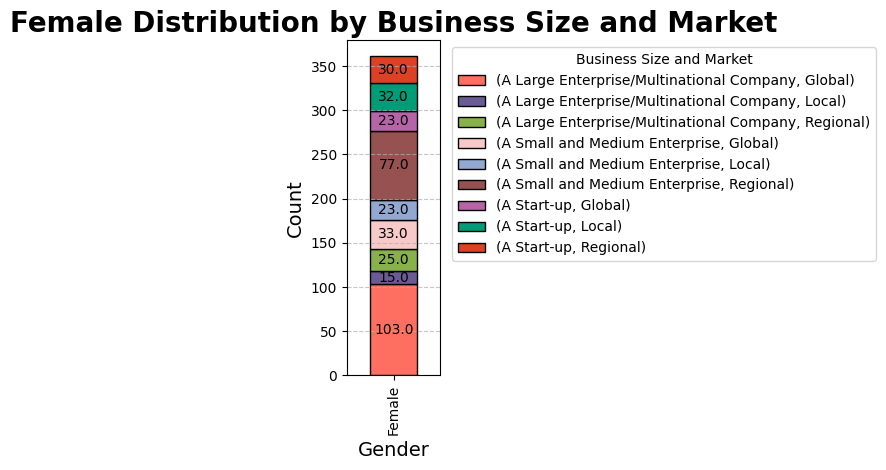

In [178]:
filtered_df = data2[data2['Gender'] == 'Female']
pivot_table = pd.pivot_table(
    filtered_df,
    columns=['BusinessSize', 'BusinessMarket'], 
    index='Gender',                             
    aggfunc='size',                       
    fill_value=0                               
)
print("\nFemale Distribution by Business Size and Market:")
print(pivot_table)

colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', 
                 '#B565A7', '#009B77', '#DD4124'] 
plt.figure(figsize=(12, 6))
bars = pivot_table.plot(kind='bar', stacked=True, color=colors, edgecolor='black')
plt.title('Female Distribution by Business Size and Market', fontsize=20, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
for rect in bars.patches:
    height = rect.get_height()
    if height > 0: 
        plt.annotate(f'{height}',
                     xy=(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2), 
                     ha='center', va='center', fontsize=10, color='black')

plt.legend(title='Business Size and Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


                                          TotalCompensationEgp
BusinessSize                                                  
A Large Enterprise/Multinational Company          40943.613311
A Small and Medium Enterprise                     35112.892010
A Start-up                                        34477.522330


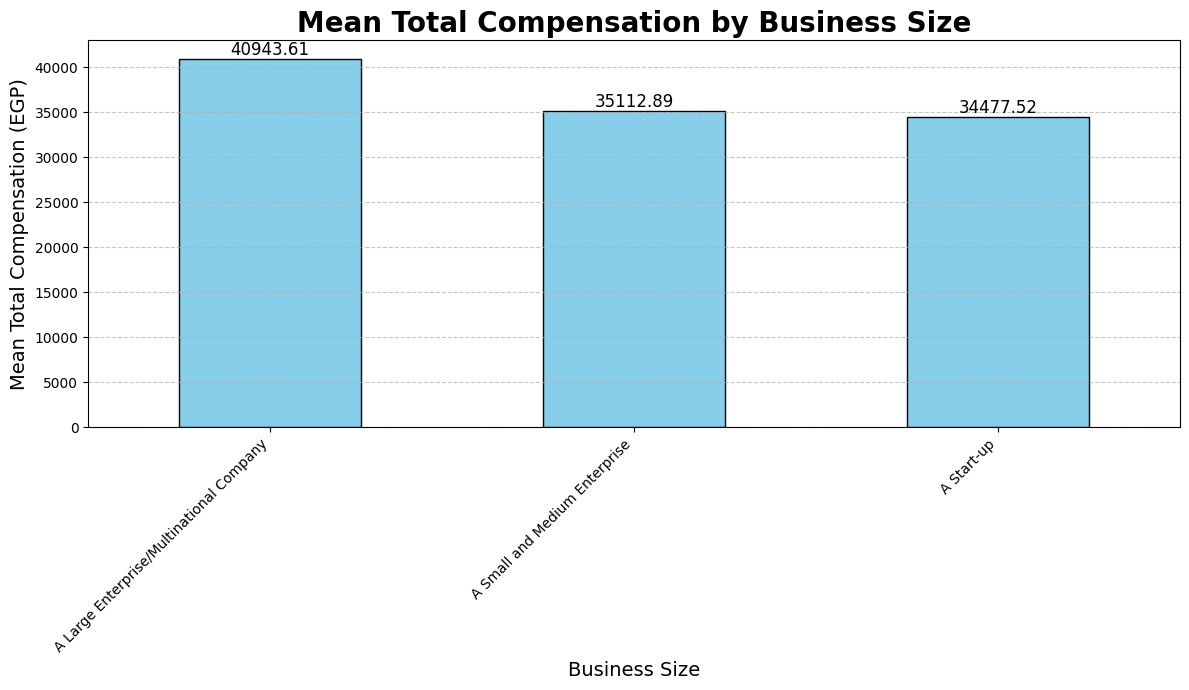

In [179]:
pivot_table = pd.pivot_table(
    data2,
    index='BusinessSize',                         
    values='TotalCompensationEgp',                  
    aggfunc='mean',                                
    fill_value=0                                   
)
print(pivot_table)

plt.figure(figsize=(12, 7)) 
bars = pivot_table['TotalCompensationEgp'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Total Compensation by Business Size', fontsize=20, fontweight='bold')
plt.xlabel('Business Size', fontsize=14)
plt.ylabel('Mean Total Compensation (EGP)', fontsize=14)
plt.xticks(rotation=45, ha='right') 
for rect in bars.patches:
    height = rect.get_height()
    plt.annotate(f'{height:.2f}',  
                 xy=(rect.get_x() + rect.get_width() / 2, height),  
                 ha='center', va='bottom', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()  



                  TotalCompensationEgp
CompanyLocation                       
Cairo                             1463
Alexandria                         100
No site in Egypt                    27
Mansoura                            21
Damietta                             6


<Figure size 1200x700 with 0 Axes>

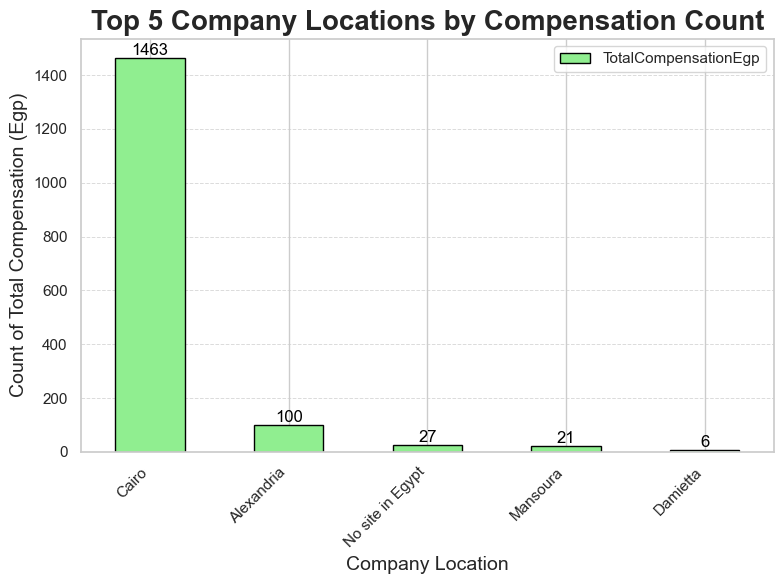

In [33]:
pivot_table = pd.pivot_table(
    data2,
    index='CompanyLocation',
    values='TotalCompensationEgp',
    aggfunc='count',
    fill_value=0
)

top_5 = pivot_table.nlargest(5, 'TotalCompensationEgp')
print(top_5)
plt.figure(figsize=(12, 7))  
bars = top_5.plot(kind='bar', figsize=(8, 6), color='lightgreen', edgecolor='black')
plt.title('Top 5 Company Locations by Compensation Count', fontsize=20, fontweight='bold')
plt.xlabel('Company Location', fontsize=14)
plt.ylabel('Count of Total Compensation (Egp)', fontsize=14)
plt.xticks(rotation=45, ha='right') 
for rect in bars.patches:
    height = rect.get_height()
    plt.annotate(f'{height}', 
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 ha='center', va='bottom', fontsize=12, color='black')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7) 
plt.tight_layout() 
plt.show()


                       TotalCompensationEgp
Level                                      
C-Level                        73000.000000
Director                      133373.333333
Fresh                          15000.000000
Group Product Manager          87013.333333
Intern                          6400.000000
Junior                         19184.146332
Manager                        96105.407407
Mid-level                      35037.862090
Principal                      84743.000000
Senior                         56276.454416
Senior Manager                 75500.000000
Senior Principal               81200.000000
Senior Staff                   73663.000000
Staff                          96130.242857
Team Lead                      74085.806557
VP                             25000.000000


<Figure size 1200x700 with 0 Axes>

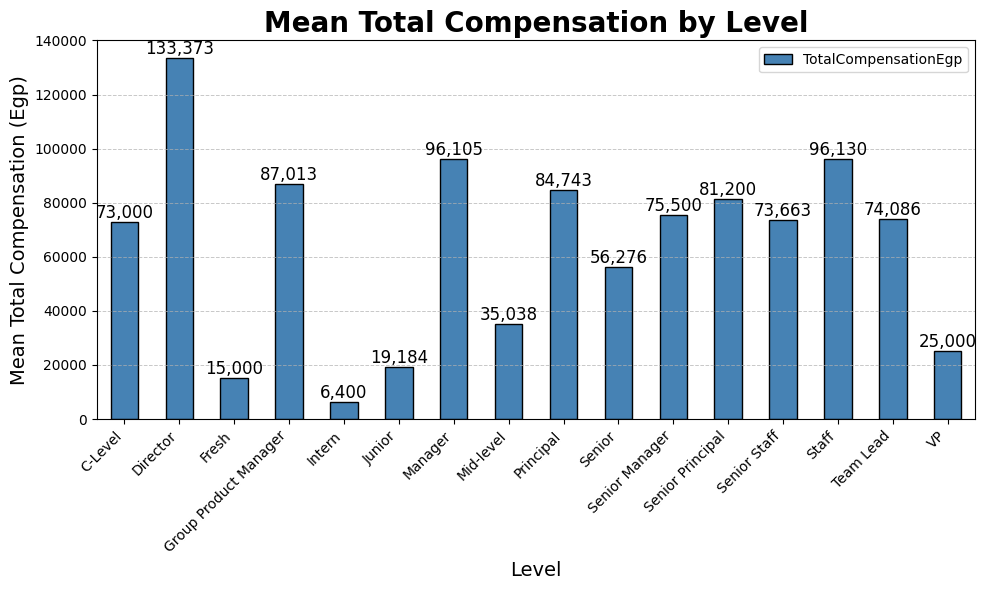

In [182]:
pivot_table = pd.pivot_table(
                             data2,
                             index='Level', 
                             values='TotalCompensationEgp',            
                             aggfunc='mean',                            
                             fill_value=0                    
                             )   
print(pivot_table)
plt.figure(figsize=(12, 7)) 
bars = pivot_table.plot(kind='bar', figsize=(10, 6), color='steelblue', edgecolor='black')
plt.title('Mean Total Compensation by Level', fontsize=20, fontweight='bold')
plt.xlabel('Level', fontsize=14) 
plt.ylabel('Mean Total Compensation (Egp)', fontsize=14) 
plt.xticks(rotation=45, ha='right') 
for rect in bars.patches:
    height = rect.get_height()
    plt.annotate(f'{height:,.0f}',  
                 xy=(rect.get_x() + rect.get_width() / 2, height),  
                 ha='center', va='bottom', fontsize=12, color='black')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7) 
plt.tight_layout()  
plt.show() 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
all_sheets = pd.read_excel(r"c:\Users\Hp\Videos\.ipynb_checkpoints\Copy of Project_Nor_for Anaiysis_1.xlsx",sheet_name=None)

In [4]:
# Check the names of the sheets
sheet_names = all_sheets.keys()
print(sheet_names)

dict_keys(['Main Data', 'Date', 'Industries', 'Programing Languages'])


In [6]:
# Example: Merging Table1 and Table2
df1 = all_sheets['Main Data']
df2 = all_sheets['Date']
merged_df1 = pd.merge(df1, df2, how='inner', left_on='Timestamp', right_on='Date')

df3 = all_sheets['Industries']
df1 = all_sheets['Main Data']
merged_df2 = pd.merge (df3,df1 , how='inner', left_on='ID_In', right_on='ID')

df4 = all_sheets['Programing Languages']
df1 = all_sheets['Main Data']
merged_df3 = pd.merge(df4,df1,  how='inner', left_on='ID_PL', right_on='ID')


Filtered Pivot Table: Top 6 Titles and Top 6 Business Markets
BusinessMarket               Regional  Global  Local
Title                                               
Backend Engineer                  162     122    115
Full-stack Engineer                96      89     84
Frontend Engineer                  81      48     38
Mobile Development Engineer        37      30     50
DevOps / SRE / Platform            35      35     14
Data Analytics                     27      29     24


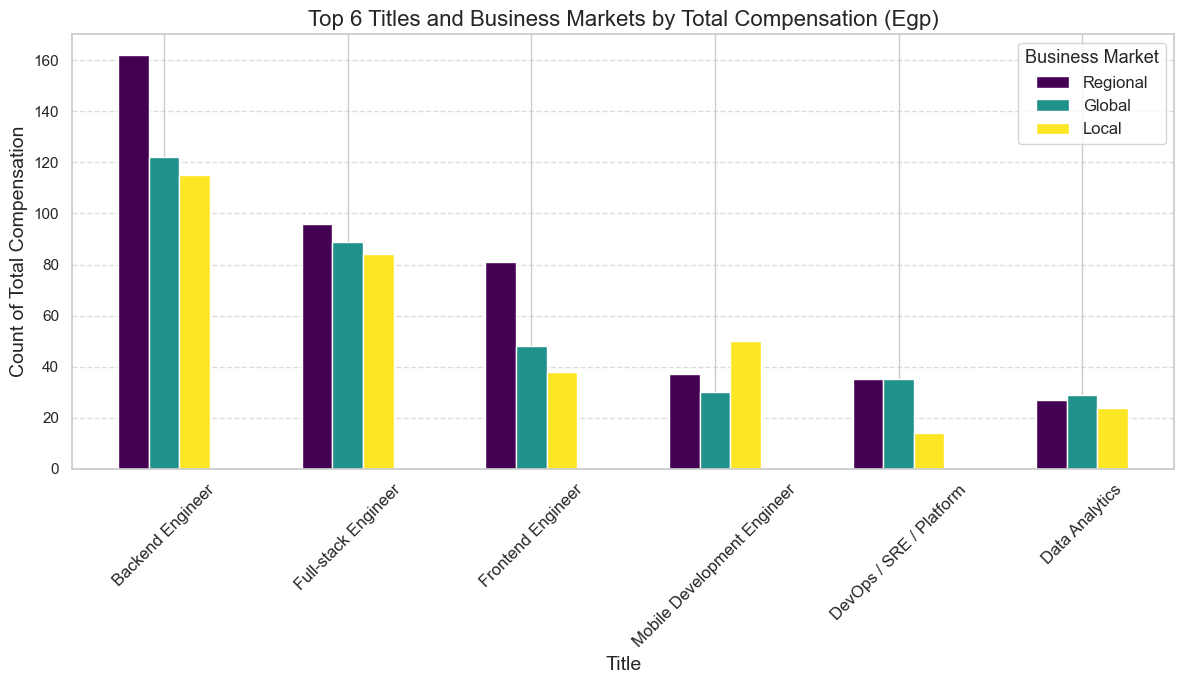

In [40]:
pivot_table = pd.pivot_table(
    merged_df1,                                  
    index='Title',                            
    columns='BusinessMarket',                    
    values='TotalCompensationEgp',            
    aggfunc='size',                              
    fill_value=0                                 
)

top_6_titles = pivot_table.sum(axis=1).nlargest(6).index
top_6_business_markets = pivot_table.sum(axis=0).nlargest(6).index
filtered_pivot_table = pivot_table.loc[top_6_titles, top_6_business_markets]
print("\nFiltered Pivot Table: Top 6 Titles and Top 6 Business Markets")
print(filtered_pivot_table)

filtered_pivot_table.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Top 6 Titles and Business Markets by Total Compensation (Egp)', fontsize=16)
plt.xlabel('Title', fontsize=14)
plt.ylabel('Count of Total Compensation', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Business Market', fontsize=12, title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Industries
Delivery              136
Fintech               587
Healthcare            191
Technology            556
Telecommunications    254
dtype: int64


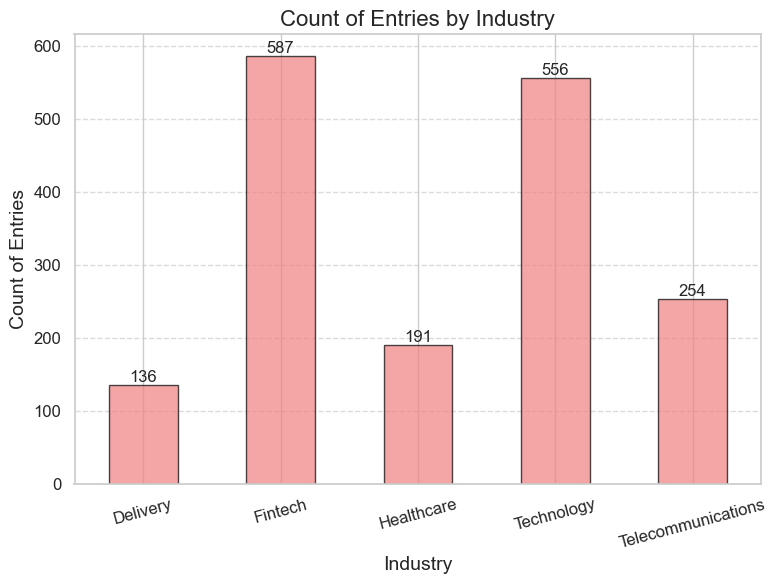

In [41]:
# Filter data for specific industries
filtered_df = merged_df2[merged_df2['Industries'].isin(['Technology', 'Fintech','Telecommunications','Healthcare','Delivery'])]
pivot_table = pd.pivot_table(
    filtered_df,          
    index='Industries',                           
    aggfunc='size',                  
    fill_value=0                     
)

print(pivot_table)

plt.figure(figsize=(8, 6))
ax = pivot_table.plot(kind='bar', color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Count of Entries by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Count of Entries', fontsize=14)
for bar in ax.patches:
    ax.annotate(f'{bar.get_height()}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Title                WorkSetting 
Backend Engineer     Hybrid          455
                     Office          157
                     Remote/Egypt    211
Data Analytics       Hybrid           68
                     Office           37
                     Remote/Egypt     13
Data Scientist       Hybrid           42
                     Office           13
                     Remote/Egypt     11
Full-stack Engineer  Hybrid          424
                     Office          274
                     Remote/Egypt    257
dtype: int64


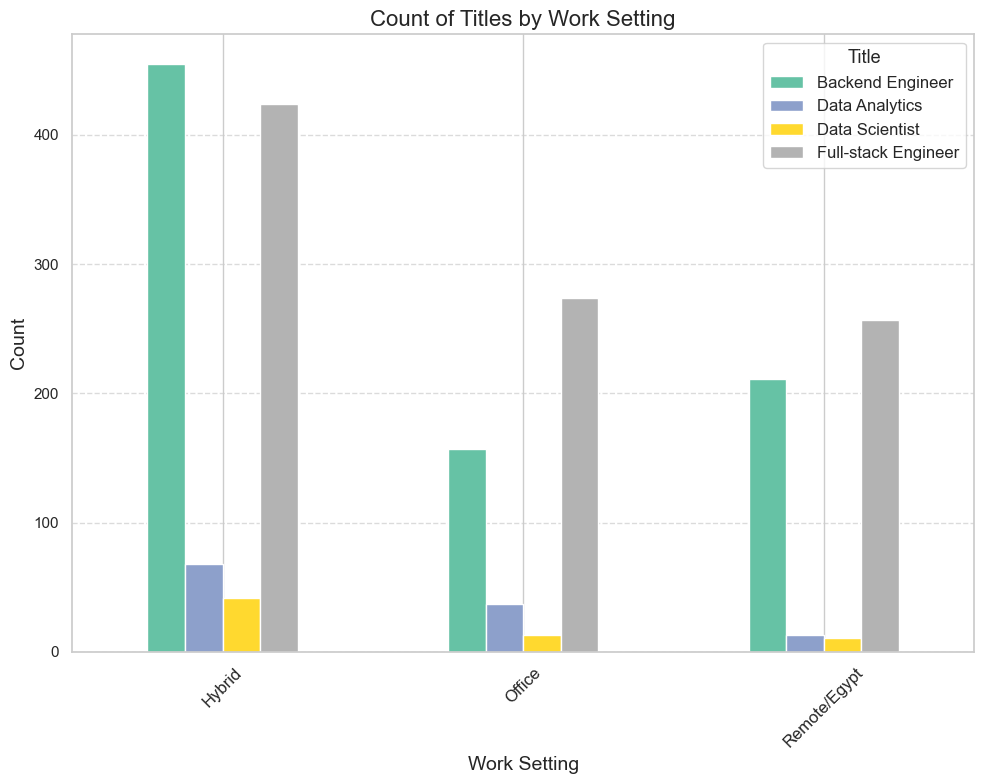

In [44]:
filtered_df = merged_df3[merged_df3['Title'].isin(['Backend Engineer','Data Analytics','Full-stack Engineer','Data Scientist'])]
pivot_table = pd.pivot_table(
    filtered_df,                    
    index=['Title','WorkSetting'],                    
    aggfunc='size',                
    fill_value=0                     
)
print(pivot_table)

pivot_table_reset = pivot_table.reset_index(name='Count')
plt.figure(figsize=(10, 8))
ax = pivot_table_reset.pivot(index='WorkSetting', columns='Title', values='Count').plot(kind='bar', stacked=False, ax=plt.gca(), colormap='Set2')
plt.title('Count of Titles by Work Setting', fontsize=16)
plt.xlabel('Work Setting', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Title', fontsize=12, title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

              TotalCompensationEgp  Percentage
WorkSetting                                   
Hybrid                         902   54.699818
Office                         376   22.801698
Remote/Egypt                   371   22.498484


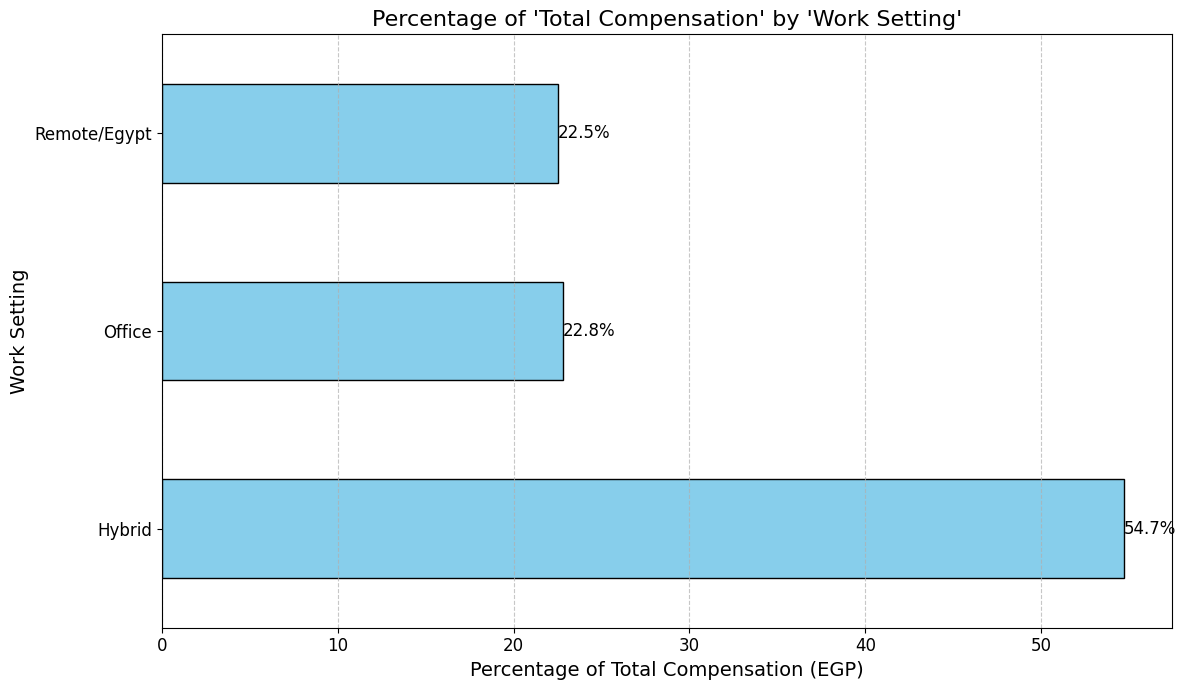

In [195]:
pivot_table = pd.pivot_table(
    merged_df1,
    values='TotalCompensationEgp', 
    index='WorkSetting',       
    aggfunc='count'                 
)

pivot_table['Percentage'] = (pivot_table['TotalCompensationEgp'] / pivot_table['TotalCompensationEgp'].sum()) * 100
print(pivot_table)

plt.figure(figsize=(12, 7))
ax = pivot_table['Percentage'].plot(kind='barh', color='skyblue', edgecolor='black')
for index, value in enumerate(pivot_table['Percentage']):
    plt.text(value, index, f'{value:.1f}%', ha='left', va='center', fontsize=12)
plt.xlabel('Percentage of Total Compensation (EGP)', fontsize=14)
plt.ylabel('Work Setting', fontsize=14)
plt.title("Percentage of 'Total Compensation' by 'Work Setting'", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



Pivot Table: Total Sales by Industry and Gender
Gender      Male
Industries      
Fintech       26
Technology    25


<Figure size 1000x600 with 0 Axes>

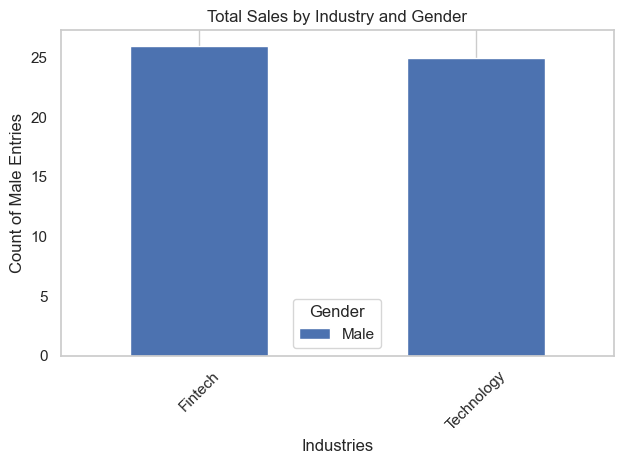

In [51]:
# Apply multiple filters
filtered_df = merged_df2[
    (merged_df2['Gender'] == 'Male') &
    (merged_df2['TotalCompensationEgp'] > 100000) &  
    (merged_df2['Industries'].isin(['Fintech', 'Technology']))
]
pivot_table = pd.pivot_table(
    filtered_df,                    
    index='Industries',            
    columns='Gender',               
    aggfunc='size',                 
    fill_value=0                   
)

print("\nPivot Table: Total Sales by Industry and Gender")
print(pivot_table)
# Plotting the data
plt.figure(figsize=(10, 6)) 
pivot_table.plot(kind='bar', legend=True)  

plt.title('Total Sales by Industry and Gender') 
plt.xlabel('Industries')  
plt.ylabel('Count of Male Entries')
plt.xticks(rotation=45) 
plt.grid(axis='y') 
plt.tight_layout()  
plt.show() 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


               Yoe
Timestamp         
2024-04-02  1351.0
2024-04-03   409.0
2024-04-04    86.0
2024-04-05    79.0
2024-04-06    58.0
2024-04-07    19.0
2024-04-08   408.0
2024-04-09   209.0
2024-04-10   108.0
2024-04-11    64.0
2024-04-12    75.0
2024-04-13    41.0
2024-04-14    84.0
2024-04-15   284.0
2024-04-16   180.0
2024-04-17    76.0
2024-04-18   126.0
2024-04-19   374.0
2024-04-20   260.0
2024-05-06    22.5
2024-05-07    19.0
2024-05-08    21.0
2024-05-09    14.0
2024-05-11     3.0
2024-05-12   414.1
2024-05-13   170.6
2024-05-14   100.5
2024-05-15    18.5
2024-05-16    22.0
2024-05-17    23.5
2024-05-18    37.0
2024-05-19    33.0
2024-05-20    19.5
2024-05-21    35.5
2024-05-22   113.9
2024-05-23    48.0
2024-05-24    15.5
2024-05-25     1.5
2024-05-26     8.0
2024-05-27     1.3
2024-05-28     9.5
2024-05-29     1.0
2024-05-30     5.0
2024-06-01     5.0
2024-06-03     4.0


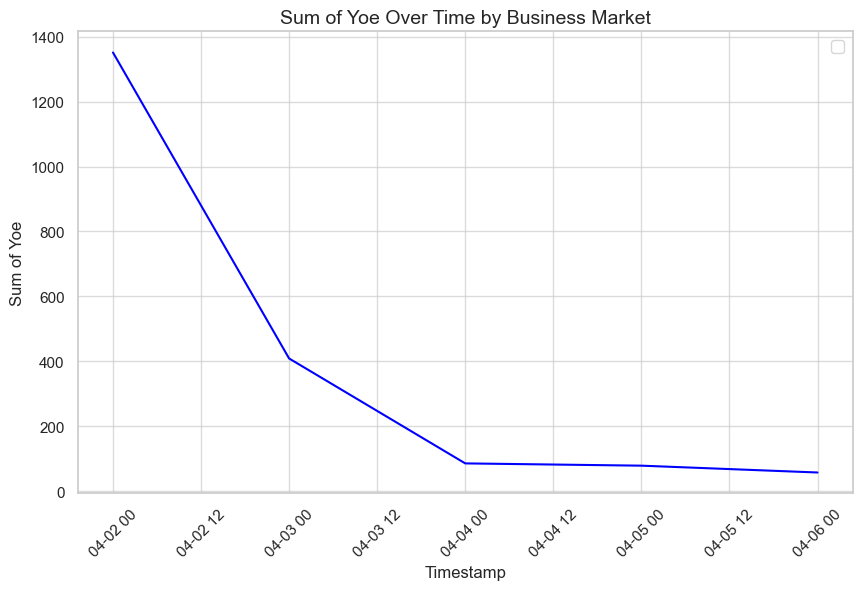

In [52]:
pivot_table = pd.pivot_table(
                             merged_df1,
                             #columns='BusinessMarket',
                             index='Timestamp',  
                             values= 'Yoe' ,                
                             aggfunc='sum',                        
                             fill_value=0                    
                             )   

print(pivot_table)
filtered_pivot_table = pivot_table.iloc[:5]  
plt.figure(figsize=(10, 6))  
plt.title('Sum of Yoe Over Time by Business Market', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Sum of Yoe', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(True, alpha=0.7)  
plt.legend(fontsize=12)  

colors = ['blue', 'green', 'orange']
for i, market in enumerate(filtered_pivot_table.columns):
    plt.plot(filtered_pivot_table.index, filtered_pivot_table[market], label=market, color=colors[i])

plt.show()

BusinessMarket                            Global  Local  Regional
BusinessSize                                                     
A Large Enterprise/Multinational Company     411     64       132
A Small and Medium Enterprise                122     96       369
A Start-up                                    57    264       134


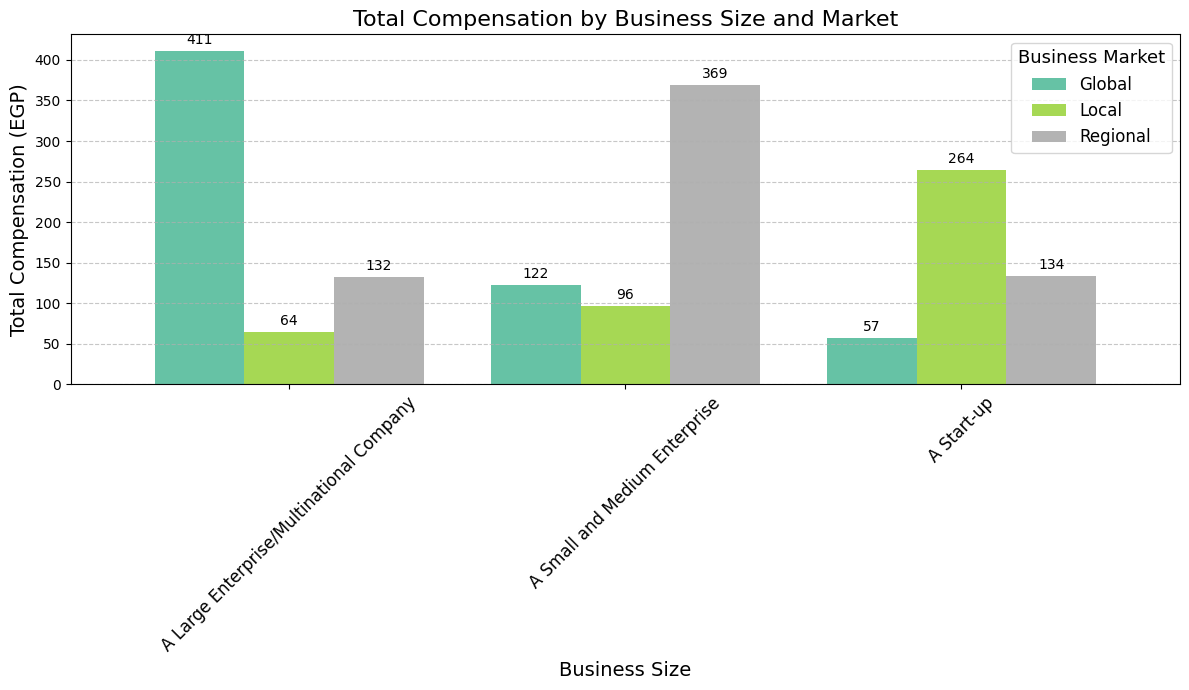

In [198]:
pivot_table = pd.pivot_table(
                             merged_df1,
                             columns='BusinessMarket',
                             index='BusinessSize',  
                             values= 'TotalCompensationEgp' ,                
                             aggfunc='count',                          
                             fill_value=0                    
                             )   

print(pivot_table)

plt.figure(figsize=(12, 7))
ax = pivot_table.plot(kind='bar', width=0.8, colormap='Set2', ax=plt.gca())
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.title('Total Compensation by Business Size and Market', fontsize=16)
plt.xlabel('Business Size', fontsize=14)
plt.ylabel('Total Compensation (EGP)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Business Market', title_fontsize='13', fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()


BusinessMarket         Global  Local  Regional
BusinessFocus                                 
Product-based company     346    333       353
Software House            244     91       282


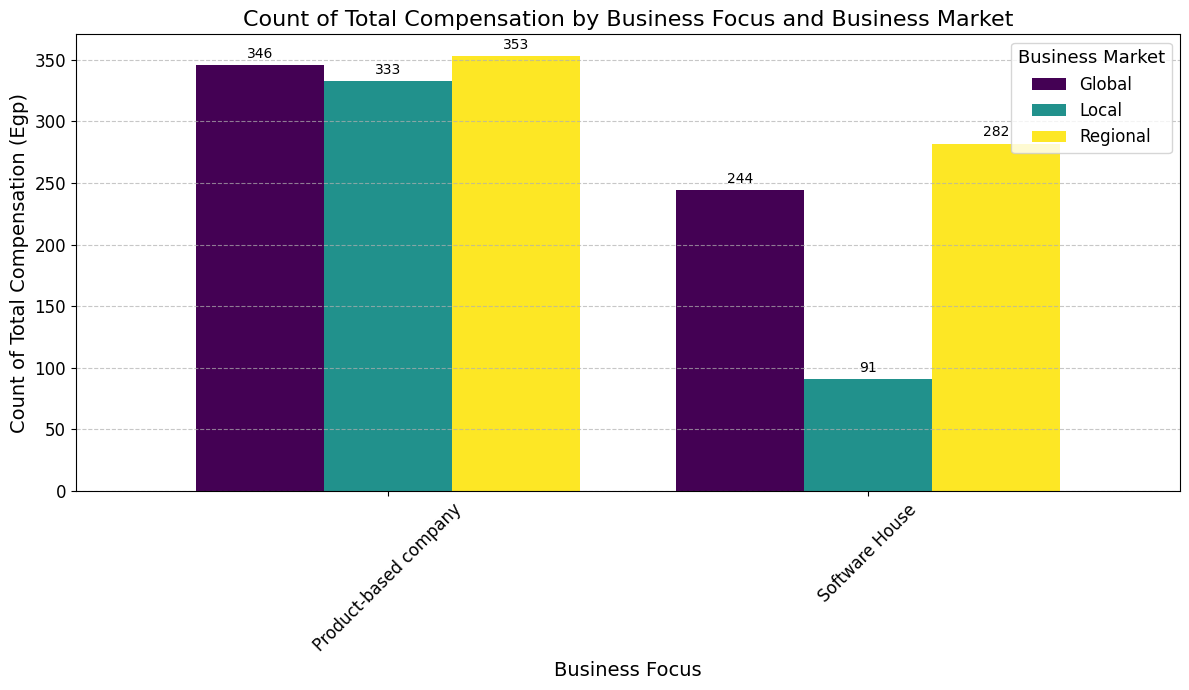

In [199]:
pivot_table = pd.pivot_table(
                             merged_df1,
                             columns='BusinessMarket',
                             index='BusinessFocus',  
                             values= 'TotalCompensationEgp' ,                
                             aggfunc='count',                            
                             fill_value=0                    
                             )   

print(pivot_table)

ax = pivot_table.plot(kind='bar', figsize=(12, 7), width=0.8, colormap='viridis')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.xlabel('Business Focus', fontsize=14)
plt.ylabel('Count of Total Compensation (Egp)', fontsize=14)
plt.title('Count of Total Compensation by Business Focus and Business Market', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Business Market', title_fontsize='13', fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()


BusinessLine           B2B  B2B & B2C lines  B2C
BusinessFocus                                   
Product-based company  406              427  199
Software House         298              252   67


<Figure size 1500x800 with 0 Axes>

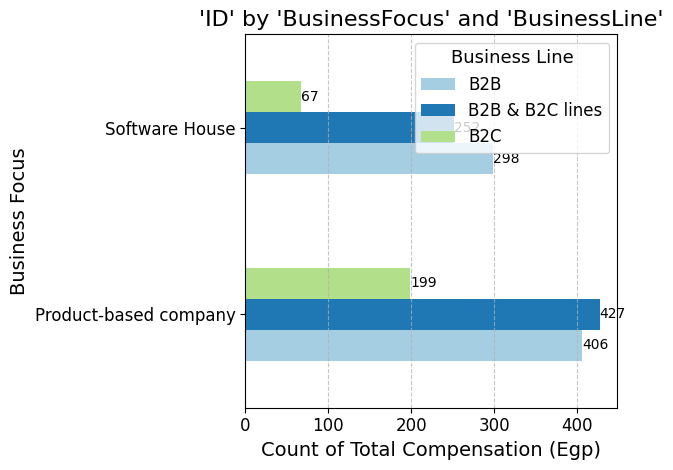

In [200]:
pivot_table = pd.pivot_table(
                             merged_df1,
                             columns='BusinessLine',
                             index='BusinessFocus',  
                             values= 'TotalCompensationEgp' ,                
                             aggfunc='count',                            
                             fill_value=0                    
                             )   

print(pivot_table)

plt.figure(figsize=(15, 8))
bars = pivot_table.plot(kind='barh', stacked=False, color=plt.cm.Paired.colors)
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', ha='left', va='center', fontsize=10)

plt.xlabel('Count of Total Compensation (Egp)', fontsize=14)
plt.ylabel('Business Focus', fontsize=14)
plt.title("'ID' by 'BusinessFocus' and 'BusinessLine'", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Business Line', title_fontsize='13', fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()

BusinessLine           B2B  B2B & B2C lines  B2C
BusinessFocus                                   
Product-based company  406              427  199
Software House         298              252   67


<Figure size 1500x800 with 0 Axes>

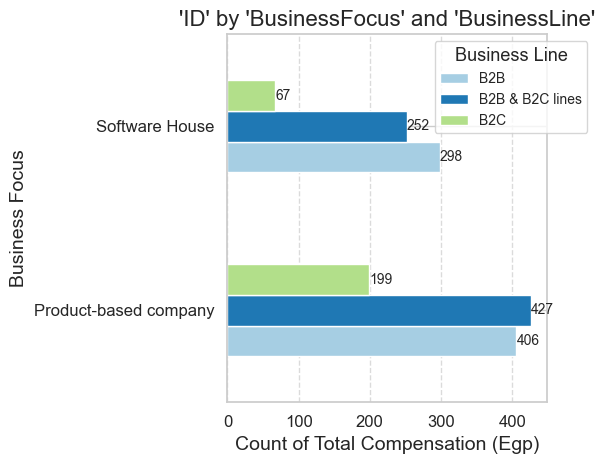

In [53]:
pivot_table = pd.pivot_table(
    merged_df1,
    columns='BusinessLine',
    index='BusinessFocus',  
    values='TotalCompensationEgp',                
    aggfunc='count',                            
    fill_value=0                    
)   

print(pivot_table)

plt.figure(figsize=(15, 8))
bars = pivot_table.plot(kind='barh', stacked=False, color=plt.cm.Paired.colors)

# Adding value annotations to the bars
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', ha='left', va='center', fontsize=10)

plt.xlabel('Count of Total Compensation (Egp)', fontsize=14)
plt.ylabel('Business Focus', fontsize=14)
plt.title("'ID' by 'BusinessFocus' and 'BusinessLine'", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjusting legend size and position
plt.legend(title='Business Line', title_fontsize='13', fontsize='10', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


                                          TotalCompensationEgp
BusinessSize                                                  
A Large Enterprise/Multinational Company                   607
A Small and Medium Enterprise                              587
A Start-up                                                 455


<Figure size 1200x700 with 0 Axes>

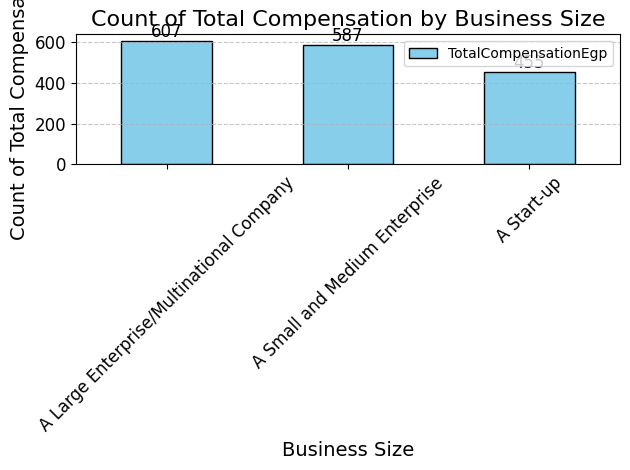

In [201]:
pivot_table = pd.pivot_table(
                             merged_df1,
                             index='BusinessSize',  
                             values= 'TotalCompensationEgp' ,                
                             aggfunc='count',                            
                             fill_value=0                    
                             )   

print(pivot_table)

plt.figure(figsize=(12, 7))
ax = pivot_table.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Count of Total Compensation by Business Size', fontsize=16)
plt.xlabel('Business Size', fontsize=14)
plt.ylabel('Count of Total Compensation', fontsize=14)
for bar in ax.patches:
    ax.annotate(f'{bar.get_height()}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


                      ID_PL
Programing Languages       
C#                      252
Css                     379
Html                    379
Javascript              561
Python                  442
Typescript              397


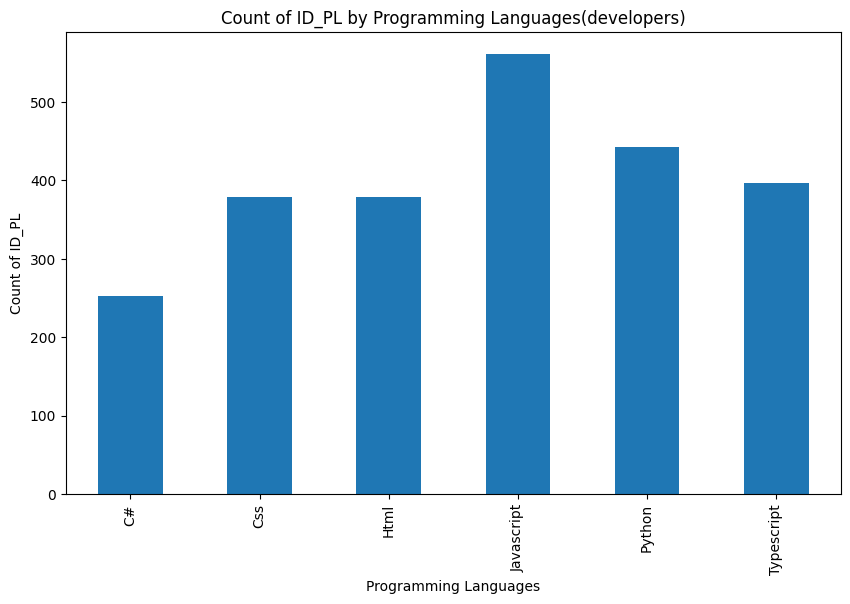

In [7]:
filtered_df = merged_df3[merged_df3['Programing Languages'].isin(['Python', 'Javascript', 'Typescript', 'Html', 'Css', 'Java', 'C#'])]
pivot_table = pd.pivot_table(
    filtered_df,
    index='Programing Languages',   
    values='ID_PL',                
    aggfunc='count',        
    fill_value=0                  
)
print(pivot_table)


pivot_table.plot(kind='bar', figsize=(10, 6), legend=False)
plt.xlabel('Programming Languages')
plt.ylabel('Count of ID_PL')
plt.title('Count of ID_PL by Programming Languages(developers)')
plt.show()


                      ID_PL
Programing Languages       
C#                      121
Css                     163
Html                    163
Javascript              189
Python                   43
Typescript              151


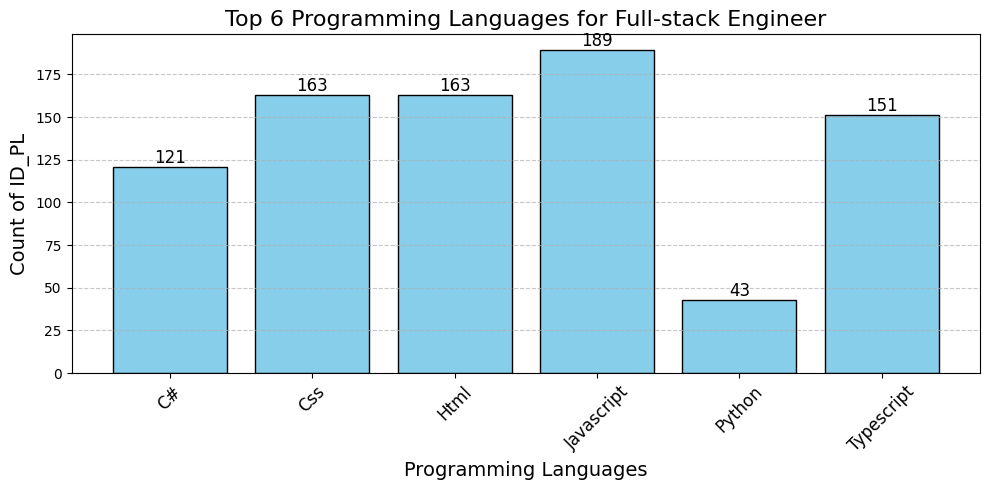

In [9]:
filtered_df = merged_df3[merged_df3['Title'].isin(['Full-stack Engineer'])]  # choose title  Full-stack Enginee Mobile Development Engineer
language_counts = filtered_df['Programing Languages'].value_counts()
top_6_languages = language_counts.nlargest(6).index
filtered_top_6 = filtered_df[filtered_df['Programing Languages'].isin(top_6_languages)]

pivot_table = pd.pivot_table(
    filtered_top_6,
    index='Programing Languages', 
    values='ID_PL',               
    aggfunc='count',               
    fill_value=0           
)
print(pivot_table)

plt.figure(figsize=(10, 5))
bars = plt.bar(pivot_table.index, pivot_table['ID_PL'], color='skyblue', edgecolor='black')
plt.xlabel('Programming Languages', fontsize=14)
plt.ylabel('Count of ID_PL', fontsize=14)
plt.title('Top 6 Programming Languages for Full-stack Engineer', fontsize=16)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


           MaxCompensationRange  MinCompensationRange
Level                                                
Junior             21733.532934          17742.514970
Manager           103666.666667          88259.259259
Mid-level          39161.885246          32108.606557
Senior             62452.991453          52116.809117


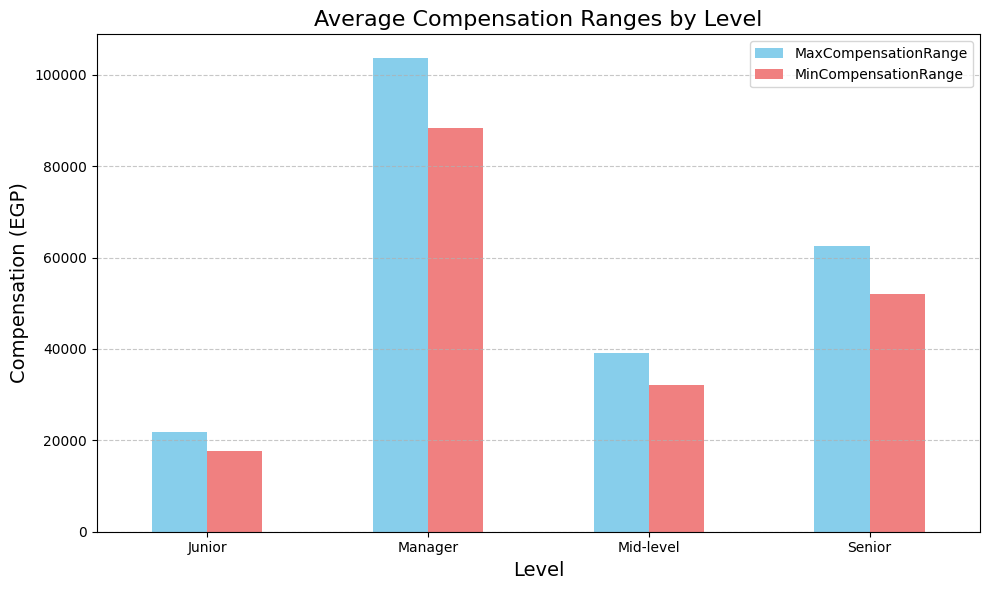

In [12]:
filtered_df = merged_df1[merged_df1['Level'].isin(['Senior', 'Junior', 'Mid-level', 'Manager'])]
pivot_table = pd.pivot_table(
    filtered_df,
    index='Level',
    values=['MinCompensationRange', 'MaxCompensationRange'],
    aggfunc='mean',
    fill_value=0
)

print(pivot_table)

plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', color=['skyblue', 'lightcoral'], ax=plt.gca())
plt.title('Average Compensation Ranges by Level', fontsize=16)
plt.xlabel('Level', fontsize=14)
plt.ylabel('Compensation (EGP)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


      TotalCompensationEgp
Yoe                       
0.0           18679.579867
0.3           15000.000000
0.4           15000.000000
0.5           14736.666667
0.6            9000.000000
0.7           17500.000000
1.0           17735.575825
1.5           21550.700000
2.0           26177.874143
2.5           21850.000000
2.7           46260.000000
3.0           34772.389297
3.5           19604.000000
3.7           59396.000000
4.0           47088.241412
4.5           40000.000000
5.0           54573.805833
5.5           55000.000000
6.0           71633.428986
7.0           63699.744444
8.0           87625.387097
9.0           89359.775000
10.0          78188.823529
11.0          94202.666667
12.0          93714.818182
13.0          87321.923077
14.0          75621.000000
15.0          79570.666667
16.0          71710.400000
17.0         165700.000000
19.0          67500.000000
21.0          23950.000000
25.0          65000.000000


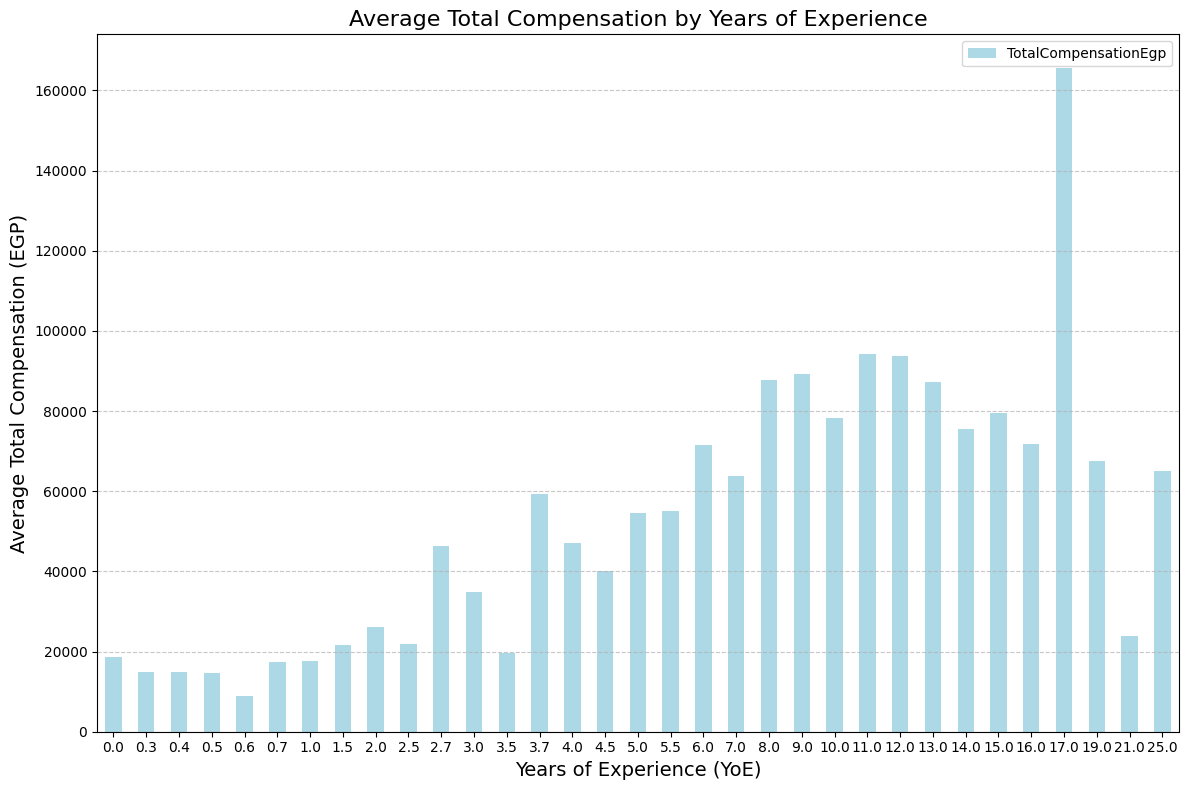

In [15]:
pivot_table = pd.pivot_table(
    merged_df1,
    index='Yoe', 
    values='TotalCompensationEgp', 
    aggfunc='mean',
    fill_value=0
)
print(pivot_table)

plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', color='lightblue', ax=plt.gca())
plt.title('Average Total Compensation by Years of Experience', fontsize=16)
plt.xlabel('Years of Experience (YoE)', fontsize=14)
plt.ylabel('Average Total Compensation (EGP)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


              TotalCompensationEgp
WorkSetting                       
Hybrid                42663.155676
Office                26142.912846
Remote/Egypt          34607.579245


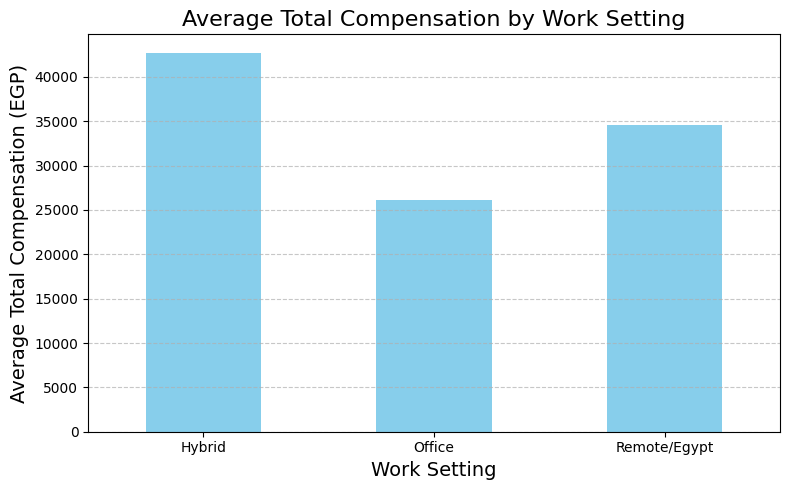

In [17]:
pivot_table = pd.pivot_table(
    merged_df1,
    index='WorkSetting',  
    values='TotalCompensationEgp',  
    aggfunc='mean',  
    fill_value=0
)

print(pivot_table)

plt.figure(figsize=(8, 5))
pivot_table.plot(kind='bar', color='skyblue', legend=False, ax=plt.gca())
plt.title('Average Total Compensation by Work Setting', fontsize=16)
plt.xlabel('Work Setting', fontsize=14)
plt.ylabel('Average Total Compensation (EGP)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



BusinessMarket                                  Global         Local  \
BusinessSize                                                           
A Large Enterprise/Multinational Company  43300.465547  34348.622344   
A Small and Medium Enterprise             48614.189344  27741.542708   
A Start-up                                41399.425614  31319.679545   

BusinessMarket                                Regional  
BusinessSize                                            
A Large Enterprise/Multinational Company  36802.803864  
A Small and Medium Enterprise             32566.797859  
A Start-up                                37754.552239  


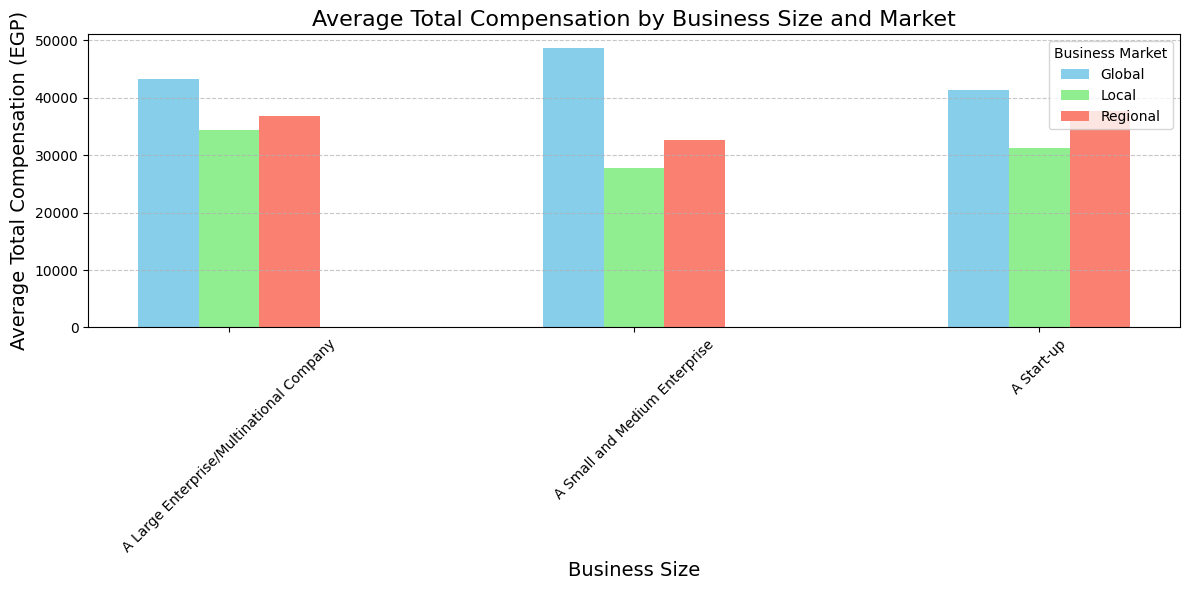

In [19]:
# Create a pivot table
pivot_table = pd.pivot_table(
    merged_df1,
    index='BusinessSize',  # Group by Business Size
    columns='BusinessMarket',  # Columns represent Business Markets
    values='TotalCompensationEgp',  # Calculate for Total Compensation
    aggfunc='mean',  # Use mean for average
    fill_value=0
)

# Print the pivot table to inspect it
print(pivot_table)

# Plotting the pivot table
plt.figure(figsize=(12, 6))

# Set bar width
bar_width = 0.15
x = np.arange(len(pivot_table.index))  # Number of unique BusinessSize

# Define colors for bars
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'violet'] 

# Plot bars for each Business Market
for i, market in enumerate(pivot_table.columns):
    plt.bar(x + i * bar_width, pivot_table[market], 
            width=bar_width, 
            label=market, 
            color=colors[i % len(colors)]) 

# Adding titles and labels
plt.title('Average Total Compensation by Business Size and Market', fontsize=16)
plt.xlabel('Business Size', fontsize=14)
plt.ylabel('Average Total Compensation (EGP)', fontsize=14)

# Adjust x-ticks for alignment with bars
plt.xticks(x + bar_width * (len(pivot_table.columns) - 1) / 2, pivot_table.index, rotation=45)

# Add legend and gridlines
plt.legend(title='Business Market')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure layout is tight to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
merged_df3.columns.tolist()

In [5]:
#data2.to_csv('ebram22.csv', index=False)